# Projet 4A Mod'IA - EMS/AD

## Partie 0. Importation des librairies et du jeu de données

In [5]:
# Import general libraries
import numpy as np
import pandas as pd

# Import plotting libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# Import machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Import linear model libraries
import statsmodels.api as sm
from itertools import combinations

# Import clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid


c:\Users\uiv10194\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\uiv10194\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\uiv10194\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\uiv10194\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
data = pd.read_csv("data.csv",sep=" ")
data = data.rename(columns={'Country': 'country',
                            'Year': 'year',
                            'Status': 'status',
                            'Life.expectancy': 'life_expectancy',
                            'Adult.Mortality': 'adult_mortality', 
                            'infant.deaths': 'infant_deaths',
                            'Alcohol': 'alcohol',
                            'Hepatitis.B': 'hepatitis_b',
                            'Measles': 'measles',
                            'under.five.deaths': 'under_five_deaths',
                            'Polio': 'polio',
                            'Total.expenditure': 'total_expenditure',
                            'Diphtheria': 'diphtheria',
                            'Population': 'population',
                            'thinness..1.19.years': 'thinness_1_19',
                            'thinness.5.9.years': 'thinness_5_9',
                            'Schooling': 'schooling'})

## Partie 1. Analyse du jeu de données
### 1.1 Analyse des variables
Dans cette première partie, nous allons chercher :

1.  Variables redondantes
2. Valeurs aberrantes

Ainsi qu'appliquer des transformations ou créer de nouvelles variables à partir de celles disponibles.

In [6]:
# vue globale du jeu de données
data.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,BMI,under_five_deaths,polio,total_expenditure,diphtheria,GDP,population,thinness_1_19,thinness_5_9,schooling
count,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000
mean,2007.828068,69.306683,200.393074,32.572904,4.858663,84.001215,2227.839611,42.013366,44.247874,87.925273,6.382357,87.986027,8249.639842,44.144928,5.165735,5.201033,12.121628
std,4.080969,8.797228,116.656200,120.950297,3.931627,17.291564,10094.663300,17.135027,163.037003,12.362209,2.263950,12.350324,13991.057774,161.152095,4.773306,4.808582,2.796095
min,2000.000000,44.000000,53.000000,0.000000,0.010000,5.000000,0.000000,11.600000,0.000000,23.000000,0.740000,19.000000,81.265673,0.081131,0.100000,0.100000,4.200000
25%,2005.000000,64.400000,123.000000,1.000000,1.322500,78.000000,0.000000,23.825000,1.000000,83.000000,4.640000,83.000000,1145.683387,2.765959,1.700000,1.700000,10.400000
50%,2008.000000,71.700000,174.000000,3.000000,4.160000,90.000000,15.000000,46.700000,4.000000,93.000000,6.130000,93.000000,3341.110425,9.425900,3.400000,3.400000,12.300000
75%,2011.000000,75.000000,247.750000,22.000000,7.557500,96.000000,372.750000,57.000000,29.000000,97.000000,7.900000,97.000000,7758.964552,27.939958,7.500000,7.500000,14.000000
max,2014.000000,89.000000,730.000000,1600.000000,17.870000,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,119172.741800,1364.270000,27.200000,28.200000,20.700000


> Commentaires :
1. Population est en millions (aucun impact sur l'analyse)
2. Measles devrait être en pour mille 
3. BMI n'est pas dans la bonne échelle (12 à 42). La valeur maximale de 77.10 suggère qu'il y a une erreur. 

In [7]:
# fonction qui affiche la matrice de corrélation
def plot_correlation_matrix(data):
    # Input: 
    #       - data: jeu de données - type: pandas dataframe
    # Output:
    #       - None 

    f = plt.figure(figsize=(10, 10)) # initialise un objet figure
    # calcule la matrice de c
    plt.matshow(data.corr(), fignum=f.number)
    plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=10, rotation=90)
    plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=10)
    plt.title('Matrice de corrélation', fontsize=16)
    plt.show()

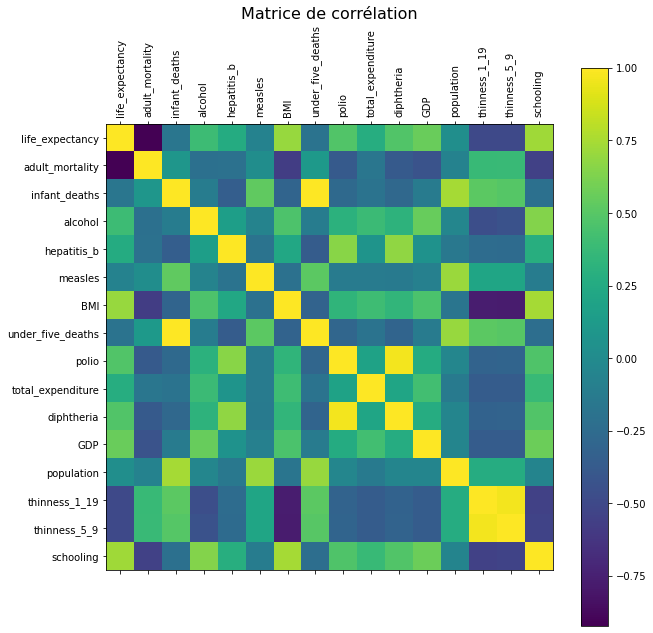

In [8]:
# matrice de corrélation
data_num = data.drop(["year"], axis=1).reset_index(drop=True)
plot_correlation_matrix(data_num)

> Commentaires :
1. Life expectancy - Adult mortality : anticorrélation forte
2. Infant Death - Under 5 death : corrélation forte
3. Thinness 1 19 - Thinness 5 9 : corrélation forte
4. Diphtheria - Polio : corrélation forte

Ainsi, nous pouvons regrouper des variables. 

### 1.2 Visualisation du jeu de données

Le jeu de données a 19 variables (16 en enlevant les variables qualitatives). Il est donc impossible de les visualiser toutes sur un même graphique. Pour cela, nous allons appliquer une Analyse en Composantes Principales (ACP) qui nous donnera un aperçu de la structure générale du jeu de données.

Pour cela, nous allons d'abord visualiser les boxplots de chaque variable.

In [9]:
# on garde que les variables quantitatives
data_num = data_num = data_num.select_dtypes(['number'])

data_num.shape

(1646, 16)

In [10]:
# Fonction affichant les boxplots d'un jeu de données
def plot_boxplots(data):
    # Input:
    #       - data: input dataframe - type: pandas dataframe
    # Output:
    #       None

    # assure que le jeu de données n'est pas vide
    assert len(data) != 0, "Empty dataframe"
    
    
    figure(figsize=(10, 8), dpi=80)
    plt.xticks(rotation=90)
    sns.boxplot(data=data)
    plt.title("Boxplots of chosen data")
    plt.xlabel("Variables")
    plt.ylabel("Values")
    plt.show()

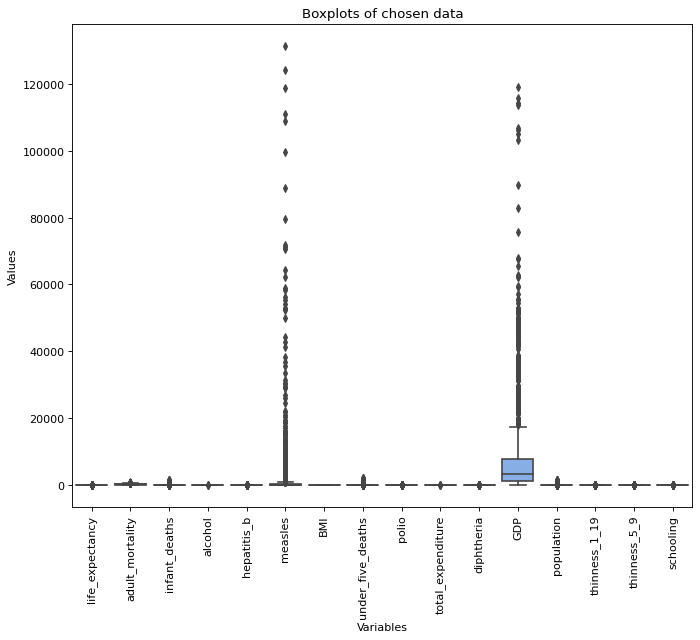

In [11]:
plot_boxplots(data_num)

> Commentaires:
1. Nous remarquons déjà que certaines variables (Measles, GDP) sont asymétriques. Pour ne pas créer un biais lors de l'ACP à cause de potentielles valeurs aberrantes, nous devons appliquer une log-transformation. 
2. Un histogramme de chaque variable est envisageable pour déterminer d'autres variables qu'il faudrait log-transformer.

In [12]:
def plot_histograms(data):
    sns.set(style="darkgrid")

    fig, axs = plt.subplots(4, 4, figsize=(15, 15))
    variables = data.keys().tolist()

    j = 1
    i = 0
    for var in variables:
        sns.histplot(data=data, x=var, kde=True, ax=axs[i,j-1])
        j += 1
        if j//5 == 1:
            i += 1
            j= 1
    plt.show()

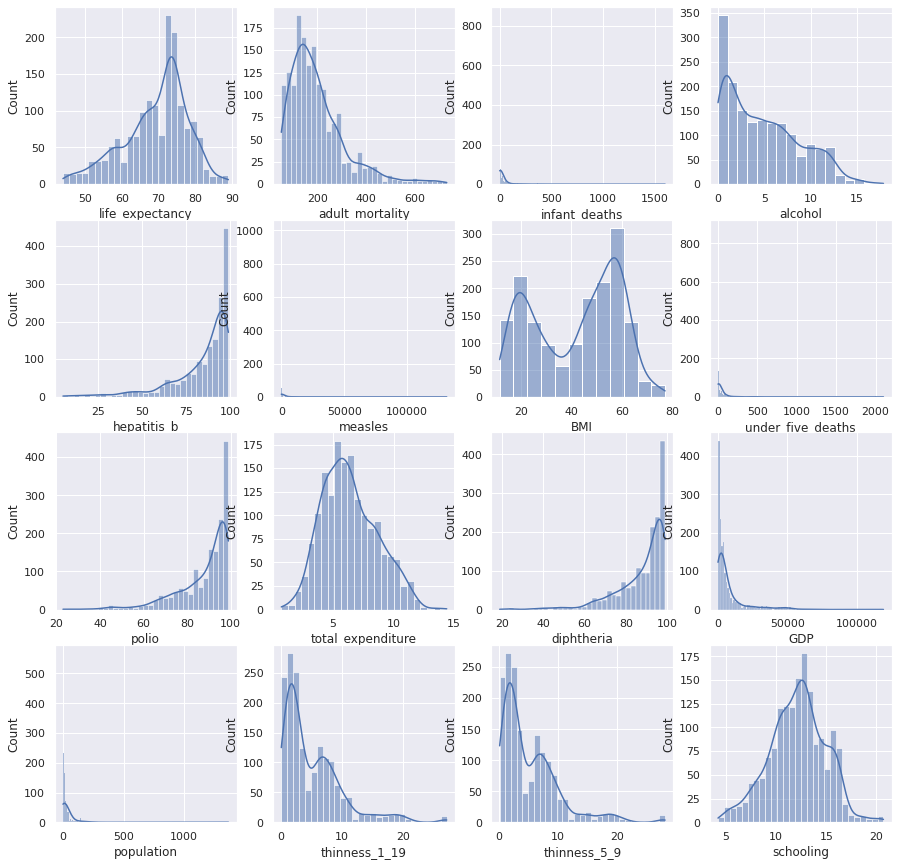

In [13]:
plot_histograms(data_num)

Nous pouvons donc appliquer les log-transformations en tenant compte de l'asymétrie.

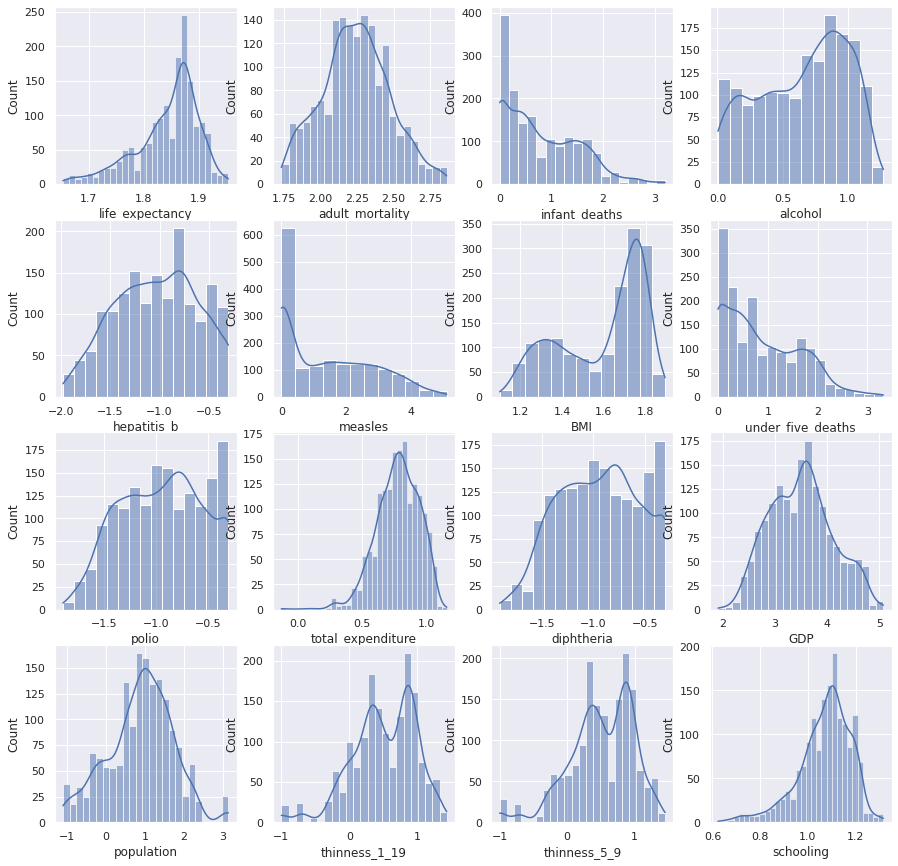

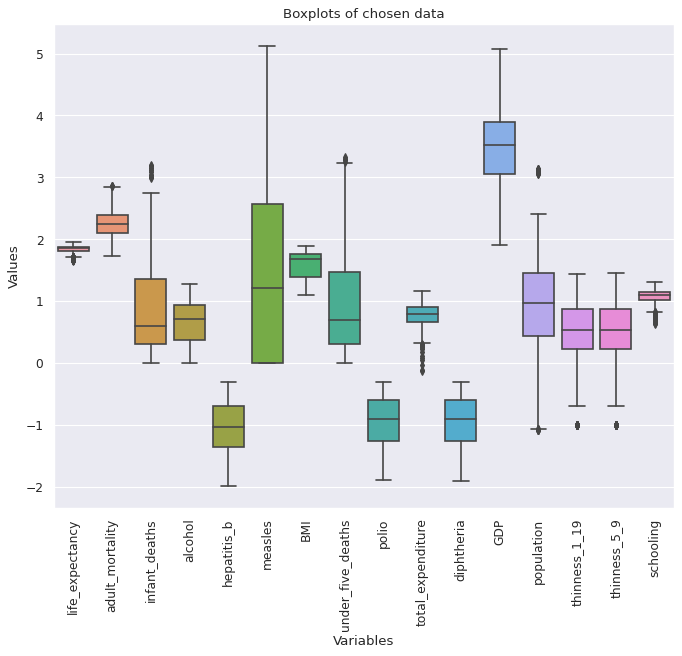

In [14]:
columns = data_num.keys().tolist()

col1 = [0,1,2,3,5,6,7]
col2 = [9,11,12,13,14,15]
col3 = [4,8,10]

for i in col1:
    data_num[columns[i]] = np.log10(data_num[columns[i]]+1)

for i in col2:
    data_num[columns[i]] = np.log10(data_num[columns[i]])

for i in col3:
    data_num[columns[i]] = -np.log10(100-data_num[columns[i]]+1)

data_num = data_num.reset_index(drop=True)

plot_histograms(data_num)
plot_boxplots(data_num)

Maintenant que les données sont log-transformées, il reste à les standardiser avant d'appliquer la ACP.

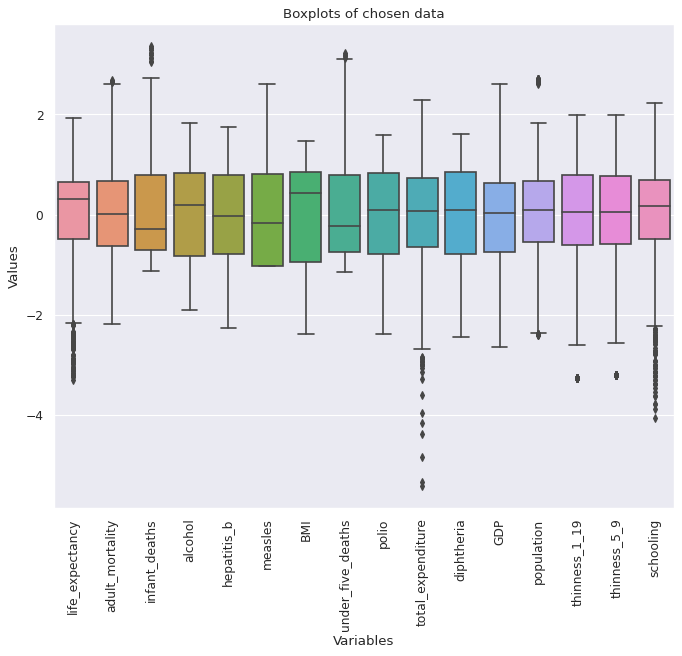

In [15]:
scaler = StandardScaler()

data_num = scaler.fit_transform(data_num)
data_num = pd.DataFrame(data_num, columns=columns) # perte des noms des colonnes apres standardisation
plot_boxplots(data_num)

Nous allons utiliser les deux fonctions suivantes pour effectuer une ACP et visualiser la variance expliquée par les différentes dimensions.

In [16]:
# fonction qui effectue la PCA d'un jeu de données
def pca_decomposition(data, n=2):
    # Input:
    #       data: input dataframe - type: dataframe object
    #       n: number of dimensions selected. Default = 2 - type: int
    # Output:
    #       data.T.head(n): first n^th dimension of PCA decomposition - type: dataframe object
    #       pipeline['pca']: pca object - type: PCA object
    #       pipeline['pca'].explained_variance_ratio_[:n]: first n eigenvalues of the PCA decomposition - type: numpy array
    pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
    data = pipeline.fit_transform(data)

    data = pd.DataFrame(data=data)

    return data.T.head(n).T, pipeline['pca'], pipeline['pca'].explained_variance_ratio_[:n]

In [17]:
# fonction qui affiche la variance expliquée de chaque dimension
def plot_explained_variance(data):
    # Input:
    #       data: input dataframe - type dataframe object
    # Output: None

    figure(figsize=(10, 8), dpi=80)
    length = data.shape[1] # maximum number of variables
    data, pca, var_array = pca_decomposition(data, length-1)
    n_bars = var_array.shape[0]
    x = np.arange(1, n_bars + 1)
    
    sns.barplot(x=x, y=var_array[:n_bars], color='blue')
    sns.lineplot(x=x-1, y=np.cumsum(var_array), color='r', label="cumulative")
    plt.title("Scree plot")
    plt.legend()
    plt.show()
    print(np.cumsum(var_array))

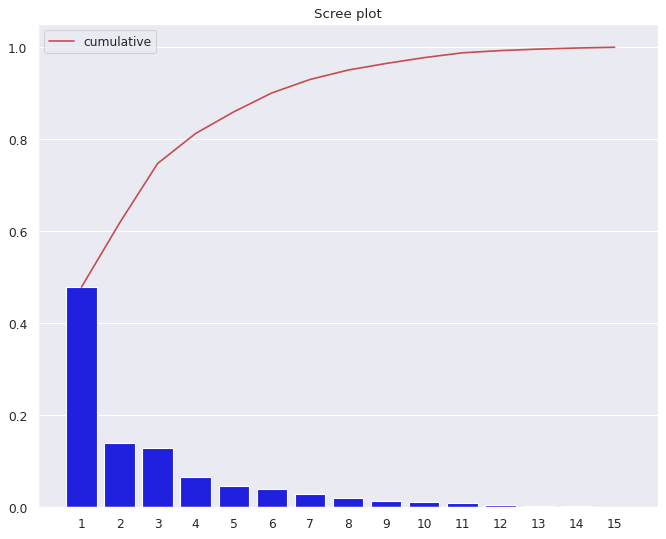

[0.47870505 0.61794066 0.7473652  0.81260689 0.85953331 0.90058755
 0.92978986 0.95022905 0.96460422 0.97726331 0.98770875 0.99254478
 0.99581357 0.9981529  0.99980495]


In [18]:
plot_explained_variance(data_num)

Ainsi, les trois premières dimensions expliquent près de 74% de l'information. Nous prenons n_components=3 dans la suite.

Visualisons les variables.

In [19]:
# fonction qui affiche le cercle des corrélations
def plot_variable_map(data, n=3):
    # Input:
    #       data: input dataframe - type dataframe object
    # Output: None
    columns = data.keys().tolist()

    length = data.shape[1]
    data,pca,var = pca_decomposition(data,length-1)
    
    coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
    coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    for i, j, nom in zip(coord1,coord2, columns):
        plt.text(i, j, nom)
        plt.arrow(0,0,i,j,color='black')
    plt.axis((-1.2,1.2,-1.2,1.2))
    # cercle
    c=plt.Circle((0,0), radius=1, color='red', fill=False)
    ax.add_patch(c)
    plt.title("Variables factor map - PCA")
    plt.xlabel("Dimension 1 : {}%".format(round(pca.explained_variance_ratio_[0]*100,2)))
    plt.ylabel("Dimension 2 : {}%".format(round(pca.explained_variance_ratio_[1]*100,2)))
    plt.show()

    if n==3:
        coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
        coord2=pca.components_[2]*np.sqrt(pca.explained_variance_[2])

        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1, 1, 1)
        for i, j, nom in zip(coord1,coord2, columns):
            plt.text(i, j, nom)
            plt.arrow(0,0,i,j,color='black')
        plt.axis((-1.2,1.2,-1.2,1.2))
        # cercle
        c=plt.Circle((0,0), radius=1, color='red', fill=False)
        ax.add_patch(c)
        plt.title("Variables factor map - PCA")
        plt.xlabel("Dimension 1 : {}%".format(round(pca.explained_variance_ratio_[0]*100,2)))
        plt.ylabel("Dimension 3 : {}%".format(round(pca.explained_variance_ratio_[2]*100,2)))
        plt.show()

        coord1=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
        coord2=pca.components_[2]*np.sqrt(pca.explained_variance_[2])

        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1, 1, 1)
        for i, j, nom in zip(coord1,coord2, columns):
            plt.text(i, j, nom)
            plt.arrow(0,0,i,j,color='black')
        plt.axis((-1.2,1.2,-1.2,1.2))
        # cercle
        c=plt.Circle((0,0), radius=1, color='red', fill=False)
        ax.add_patch(c)
        plt.title("Variables factor map - PCA")
        plt.xlabel("Dimension 2 : {}%".format(round(pca.explained_variance_ratio_[1]*100,2)))
        plt.ylabel("Dimension 3 : {}%".format(round(pca.explained_variance_ratio_[2]*100,2)))
        plt.show()

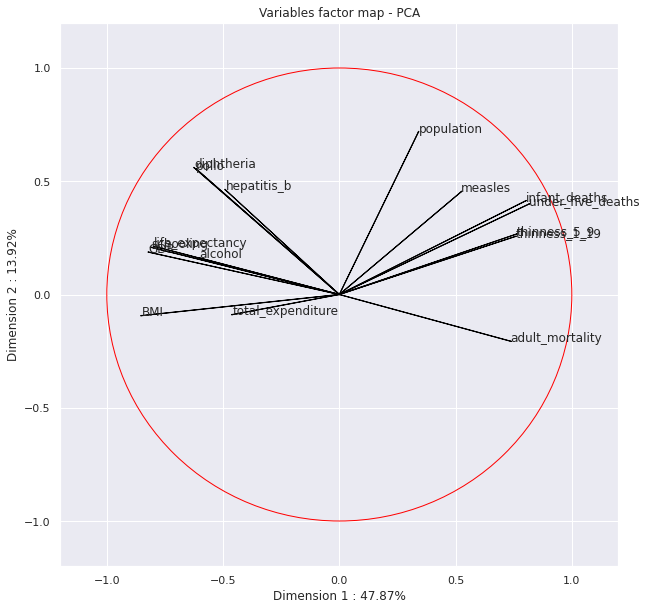

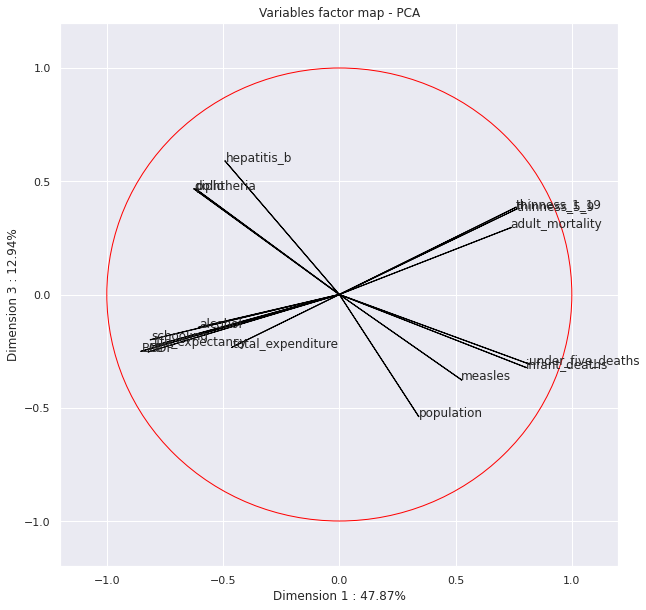

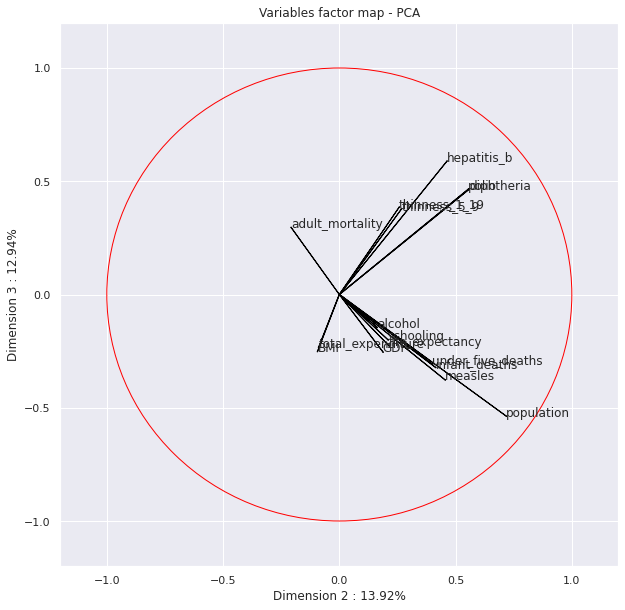

In [20]:
plot_variable_map(data_num)

Nous retrouvons les résultats de la matrice de corrélation. Ainsi, nous pouvons créer de nouvelles variables. Par exemple:
1. vaccin_cov : regroupe Diphtheria, Hepatitis.B et Polio
2. thinness : regroupe thinness 1-19 et thinness 5-9
3. infant_mortality : regroupe infant death et under five death

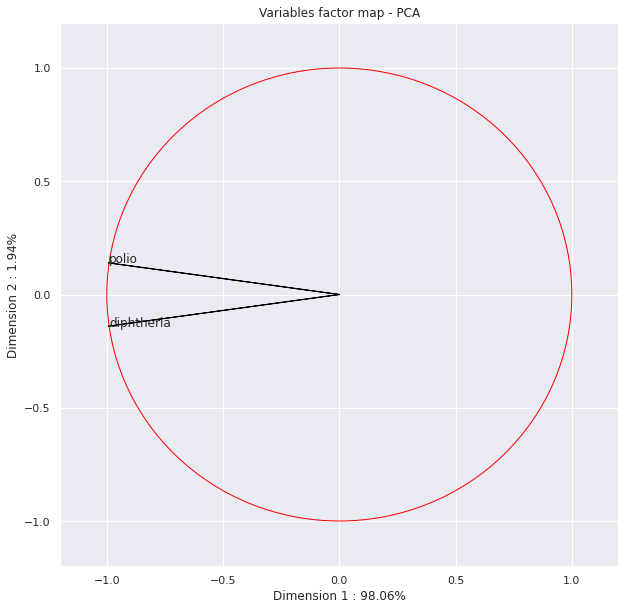

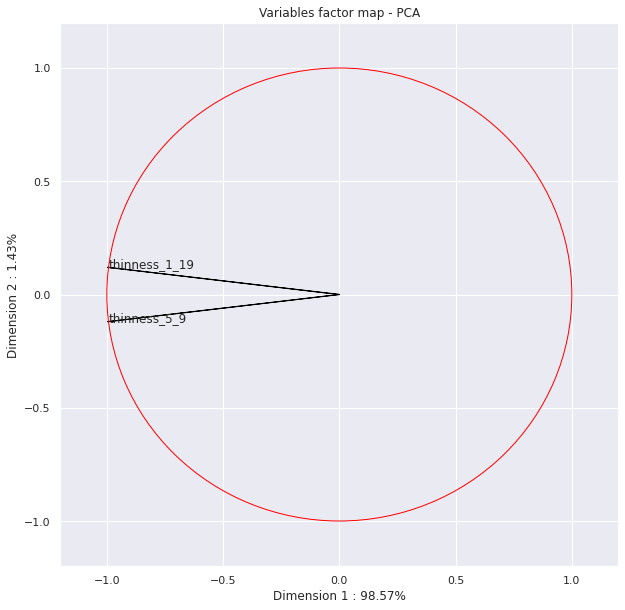

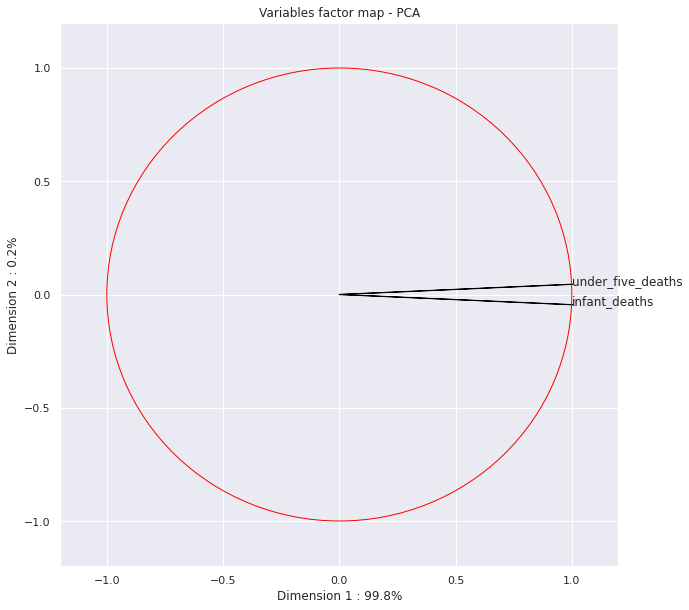

In [21]:
# vaccin_cov
data_vaccin = data_num[["polio", "diphtheria"]]
plot_variable_map(data_vaccin,2)

#thinness
data_thinness = data_num[["thinness_1_19","thinness_5_9"]]
plot_variable_map(data_thinness,2)

#infant mortality
data_death = data_num[["infant_deaths","under_five_deaths"]]
plot_variable_map(data_death,2)

La première dimension explique plus de 98% de l'information dans les trois cas. Nous pouvons donc faire le regroupement sans perdre beaucoup d'information. Cependant, il faut faire attention à l'orientation des flèches. Ici, dans les deux premiers cas, les flèches vont vers la gauche, il faut donc mettre un signe moins.

In [22]:
# vieux jeu de données sans les variables transformées 
data_num_old = data_num.copy()

In [23]:
data_num["cov_vaccin"] = -pca_decomposition(data_vaccin, n=1)[0][0]
data_num["thinness"] = -pca_decomposition(data_thinness, n=1)[0][0]
data_num["infant_mortality"] = pca_decomposition(data_death, n=1)[0][0]

In [24]:
print("old shape: ",data_num_old.shape)
data_num_new = data_num.drop(["infant_deaths","under_five_deaths","polio","diphtheria","thinness_1_19","thinness_5_9"],axis=1).reset_index(drop=True)
print("new shape: ",data_num_new.shape)

old shape:  (1646, 16)
new shape:  (1646, 13)


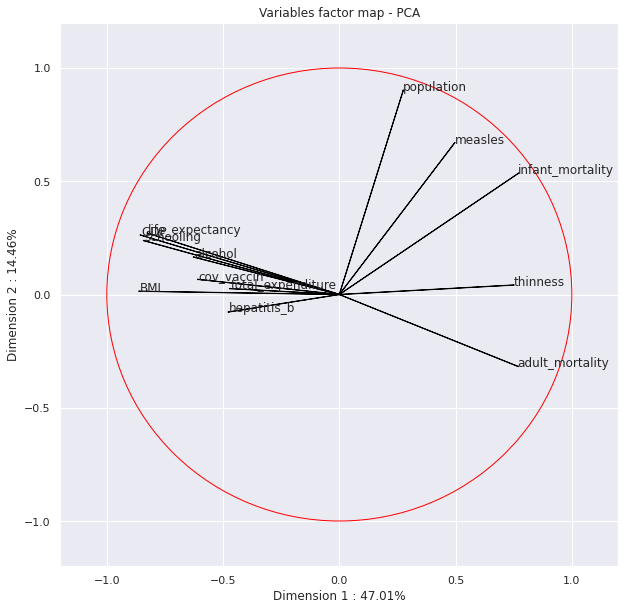

In [25]:
plot_variable_map(data_num_new,2)

> Commentaires sur l'interprétation des axes :
1. 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  del sys.path[0]


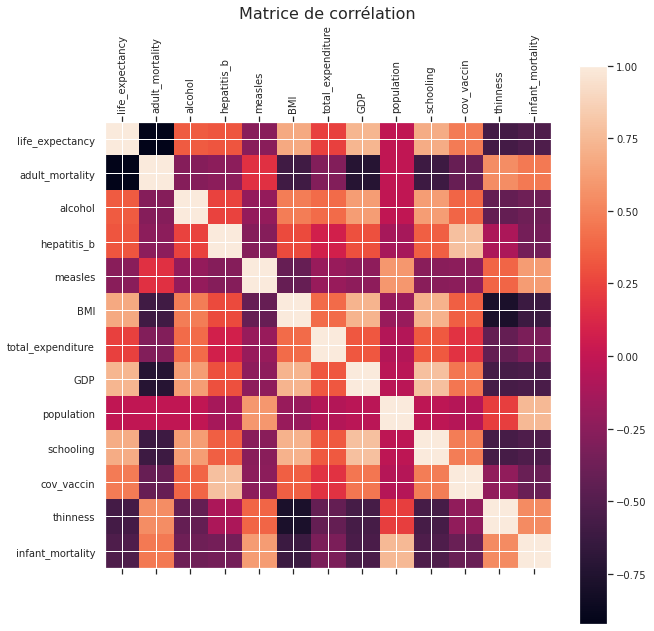

In [26]:
plot_correlation_matrix(data_num_new)

In [27]:
data_old = data_num_old.copy()
data_old['country'] = data['country'].tolist()
data_old['year'] = data['year'].tolist()
data_old['status'] = data['status'].tolist()
data_old.shape

(1646, 19)

In [28]:
data_new = data_num_new.copy()
data_new['country'] = data['country'].tolist()
data_new['year'] = data['year'].tolist()
data_new['status'] = data['status'].tolist()
data_new.shape

(1646, 16)

## Partie 2. Étude de l'espérance de vie en 2014

Dans cette partie, nous limitons notre étude à 2014.

In [29]:
data_2014 = data_old[data_old['year'] == 2014]

print("number of countries with 2014 data ", data_2014.shape[0])
print("total countries ", data_old['country'].unique().shape[0])

number of countries with 2014 data  130
total countries  132


Nous remarquons qu'il y a deux pays sans données en 2014. Nous pouvons les identifier de la façon suivante :

In [30]:
countries_2014 = data_2014['country'].unique()
all_countries = data_new['country'].unique()

print("Countries with no 2014 data: ")
for country in all_countries:
    if country not in countries_2014:
        print(country)

Countries with no 2014 data: 
Eritrea
Syrian Arab Republic


### 2.1 Influence du taux de mortalité infantile et adulte sur l'espérance de vie

En premier lieu, nous chargeons les données nécessaires pour cette étude. Nous allons utiliser notre variable transformée *infant_mortality*.

In [31]:
data_study = data_2014[['life_expectancy', 'adult_mortality', 'infant_deaths']]

Visualisons d'abord les matrices de corrélation.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  del sys.path[0]


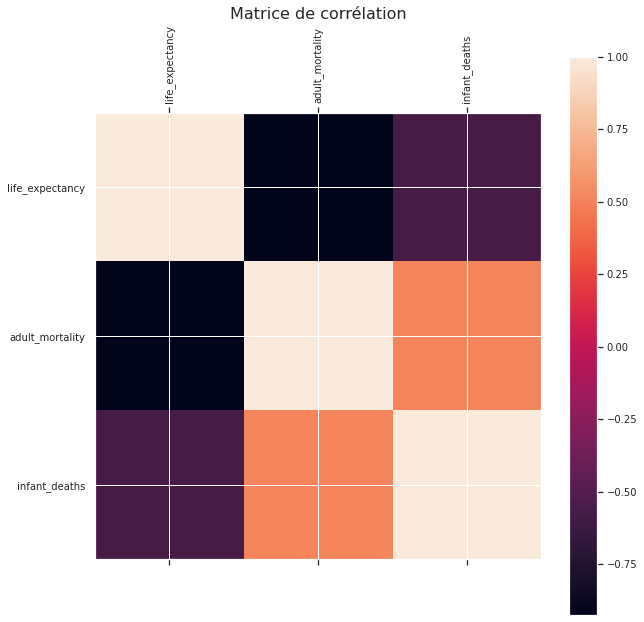

In [32]:
plot_correlation_matrix(data_study)

Nous allons effectuer une régression linéaire. 

**ecrire la regression lineaire, hyp etc **

In [33]:
# variable réponse
Y = data_study["life_expectancy"]

# variables explicatives
X = data_study[["adult_mortality", "infant_deaths"]]

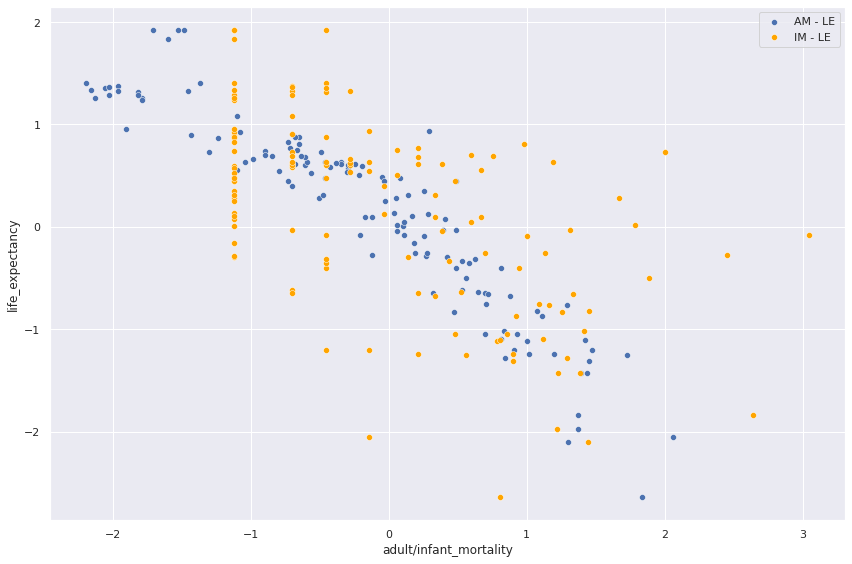

In [34]:
plt.figure(figsize=(12, 8), tight_layout=True)

sns.scatterplot(data=data_study, x='adult_mortality', y='life_expectancy', color='b', label='AM - LE')
sns.scatterplot(data=data_study, x='infant_deaths', y='life_expectancy', color='orange', label='IM - LE')
plt.xlabel('adult/infant_mortality')
plt.ylabel('life_expectancy')
plt.legend()
plt.show()

> Commentaire :
1. adult_mortality : comme vu dans le cas général, il existe une relation antilinéaire entre la mortalité adulte et l'espérance de vie.
2. infant_deaths : la dispersion est plus grande. À priori, la mortalité infantile n'a pas trop d'influence sur l'espérance de vie.

Faisons une régression linéaire pour confirmer ces résultats.

In [35]:
# on ajoute la constante à notre modèle (n'ai pas fait automatiquement sur statsmodels)
X = sm.add_constant(X)

# ordinary least squares model (OLS)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     421.9
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           8.08e-57
Time:                        00:49:55   Log-Likelihood:                -42.027
No. Observations:                 130   AIC:                             90.05
Df Residuals:                     127   BIC:                             98.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0145      0.030      0.481      0.631      -0.045       0.074
adult_mortality    -0.7945      0.034    -23.053      0.000      -0.863      -0.726
infant_deaths      -0.1249      0.035     -3.575      0.000      -0.194      -0.056
==============================================================================
Omnibus:                        4.562   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                5.707
Skew:                          -0.124   Prob(JB):                       0.0576
Kurtosis:                       3.996   Cond. No.                         1.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Commentaire :
1. Les deux variables expliquent près de 87% de la variabilité de la variance espérance de vie.
2. La variable mortalité adulte est celle qui a le plus de poids (coefficient plus élevé).
3. La p-valeur liée au test de nullité de l'intercept suggère que nous pouvons l'annuler au risque 5%.
4. Le coefficient Durbin-Watson mesure l'homoscédasticité des données. Nous obtenons 2.030 ce qui montre qu'il n'y a pas d'autocorrélation dans les données.

Ainsi, nous obtenons le modèle suivant ne dépendant que de *adult_mortality* et *infant_deaths* avec un $$R^2 = 0.872$$. Le coefficent de la première variable étant plus élevé, elle a le plus d'influence sur l'espérance de vie.

In [36]:
# variable réponse
Y = data_study["life_expectancy"]

# variables explicatives
X = data_study[["adult_mortality", "infant_deaths"]]

# ordinary least squares model (OLS)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              436.7
Date:                Fri, 21 Jan 2022   Prob (F-statistic):                    6.62e-58
Time:                        00:49:55   Log-Likelihood:                         -42.146
No. Observations:                 130   AIC:                                      88.29
Df Residuals:                     128   BIC:                                      94.03
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
adult_mortality    -0.7974      0.034    -23.546      0.000      -0.864      -0.730
infant_deaths      -0.1239      0.035     -3.563      0.001      -0.193      -0.055
==============================================================================
Omnibus:                        4.487   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                5.567
Skew:                          -0.122   Prob(JB):                       0.0618
Kurtosis:                       3.984   Cond. No.                         1.74
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Maintenant, nous nous demandons ce qui se passerait si on ajoute la variable *status*. Dans cette partie, nous décidons de séparer la variable *infant_mortality* dans les deux variables initiales *under_five_deaths* et *infant_deaths*. Chargeons le jeu de données pour cette étude et étudions la variable *status*.

In [37]:
data_study = data_2014[['life_expectancy', 'adult_mortality', 'infant_deaths', 'status']]

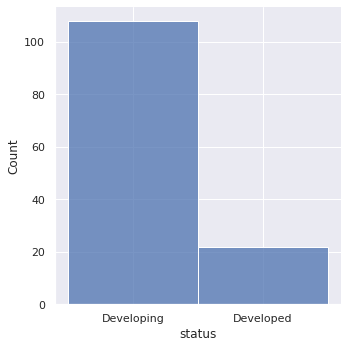

In [38]:
sns.displot(data=data_study, x='status')

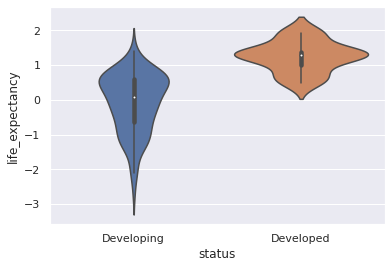

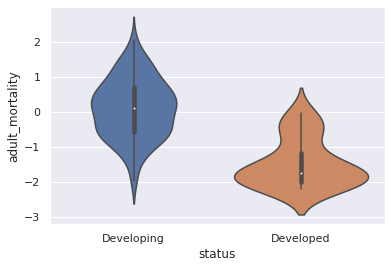

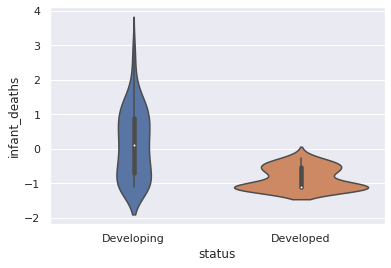

In [39]:
sns.violinplot(x="status", y="life_expectancy", data=data_study)
plt.show()
sns.violinplot(x="status", y="adult_mortality", data=data_study)
plt.show()
sns.violinplot(x="status", y="infant_deaths", data=data_study)
plt.show()

> Commentaire :
1. Dans les pays en voie de développement, les distributions pour chacune des variables sont très étalées sur l'ensemble des valeurs.
2. Dans les pays développés, les distributions sont très concentrées sur la moyenne (point blanc).
3. Les pays en voie de développement ont plus de valeurs aberrantes (présence de la pointe).

Ainsi, il semblerait y avoir une influence de *status* sur les différentes variables.


Construisons le modèle.

In [40]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [41]:
# fonction permettant de créer les formules pour les modèles linéaires (comme sur R)
# source : personne sur stackoverflow
def ols_formula(data, dependent_var, *excluded_cols):
    # Input:
    #       - data : pandas dataframe
    #       - dependent_var : variable dépendante - type str
    #       - *excluded_cols : variables exclues du modèle - type str
    # Output:
    #       - formule du modele lineaire comme sur R 
    df_columns = list(data.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [42]:
data_study_lm_interactions = ols(ols_formula(data_study, 'life_expectancy') + ' + adult_mortality*status + infant_deaths*status', data=data_study).fit()
data_study_lm_interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     187.3
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           5.15e-56
Time:                        00:49:56   Log-Likelihood:                -34.739
No. Observations:                 130   AIC:                             81.48
Df Residuals:                     124   BIC:                             98.68
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.5432      0.250      2.176      0.031       0.049       1.037
status[T.Developing]                    -0.5146      0.252     -2.045      0.043      -1.013      -0.017
adult_mortality                         -0.4507      0.104     -4.331      0.000      -0.657      -0.245
adult_mortality:status[T.Developing]    -0.4149      0.112     -3.709      0.000      -0.636      -0.193
infant_deaths                           -0.0502      0.225     -0.223      0.824      -0.495       0.395
infant_deaths:status[T.Developing]      -0.0615      0.227     -0.271      0.787      -0.511       0.388
==============================================================================
Omnibus:                        7.652   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.022   Jarque-Bera (JB):               13.743
Skew:                           0.130   Prob(JB):                      0.00104
Kurtosis:                       4.571   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le $R^2$ du modèle est plutôt bon. Les p-valeurs nous suggèrent du supprimer l'intéraction *infant_deaths:developing*.

In [43]:
data_study_lm_no_infant_interaction = ols(ols_formula(data_study, 'life_expectancy') + ' + adult_mortality*status', data=data_study).fit()
anova_lm(data_study_lm_no_infant_interaction, data_study_lm_interactions)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,125.0,12.996677,0.0,NaN,NaN,NaN
1,124.0,12.989010,1.0,0.007667,0.073193,0.787193


Nous obtenons $$p_{value} = 0.7871 \geq 0.05$$. Nous ne rejettons pas l'hypothèse nulle au risque $$ \alpha = 5\%$$. Nous gardons donc le modèle sans intéraction entre *infant_deaths* et *status*

In [44]:
data_study_lm_no_infant_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     235.8
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           3.26e-57
Time:                        00:49:56   Log-Likelihood:                -34.777
No. Observations:                 130   AIC:                             79.55
Df Residuals:                     125   BIC:                             93.89
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.4939      0.170      2.910      0.004       0.158       0.830
status[T.Developing]                    -0.4654      0.173     -2.689      0.008      -0.808      -0.123
adult_mortality                         -0.4494      0.104     -4.340      0.000      -0.654      -0.244
adult_mortality:status[T.Developing]    -0.4169      0.111     -3.749      0.000      -0.637      -0.197
infant_deaths                           -0.1103      0.034     -3.258      0.001      -0.177      -0.043
==============================================================================
Omnibus:                        7.518   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.023   Jarque-Bera (JB):               13.428
Skew:                           0.122   Prob(JB):                      0.00121
Kurtosis:                       4.556   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En conclusion, nous conservons la même valeur de $R^2 = 0.883$. Les tests de nullité de nous suggèrent pas de supprimer d'autres variables ou intérations. Nous conservons donc ce modèle. Les variables qui ont le plus de poids sont :
- La variable *status*
- La variable *adult_mortality*

### 2.2 Impact de la couverture vaccinale sur l'espérance de vie en 2014

Grâce à l'ACP effectuée précédemment, nous pouvons utiliser notre variable transformée *cov_vaccin*. Ainsi, nous n'aurons pas l'effet d'intéraction entre *polio* et *diphtheria* qui fausserait l'interprétation des résultats.

In [45]:
data_2014 = data_new[data_new['year'] == 2014]

data_study = data_2014[['life_expectancy', 'cov_vaccin', 'hepatitis_b']]

In [46]:
# variable réponse
Y = data_study["life_expectancy"]

# variables explicatives
X = data_study[["cov_vaccin", "hepatitis_b"]]
X = sm.add_constant(X)
# ordinary least squares model (OLS)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     31.63
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           7.13e-12
Time:                        00:49:56   Log-Likelihood:                -147.96
No. Observations:                 130   AIC:                             301.9
Df Residuals:                     127   BIC:                             310.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2296      0.071      3.253      0.001       0.090       0.369
cov_vaccin      0.6438      0.112      5.753      0.000       0.422       0.865
hepatitis_b    -0.5159      0.171     -3.016      0.003      -0.854      -0.177
==============================================================================
Omnibus:                        4.409   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                4.033
Skew:                          -0.426   Prob(JB):                        0.133
Kurtosis:                       3.131   Cond. No.                         5.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le $R^2 = 0.332$ est faible, $33\%$ de la variabilité est expliquée par *cov_vaccin* et *hepatitis_b*. La couverture vaccinale des maladies *polio* et *diphtheria* a le plus de poids dans ce modèle.

Cependant, étant donné le $R^2$ si faible, nous ne pouvons pas conclure sur l'impact de la couverture vaccinale sur l'espérance de vie.

### 2.3 Variables prédictives expliquant l'espérance de vie en 2014

Dans cette partie, on s'intéresse à voir quelles sont les variables qui expliquent le mieux l'espérance de vie en 2014. On prend le jeu de données transformé.

In [47]:
data_2014 = data_new[data_new['year'] == 2014]

data_study = data_2014.drop(['country', 'year'], axis=1).reset_index(drop=True)

In [48]:
def output_str(data, *variables):
    columns = data.keys().tolist()
    output = ''

    for i in range(1,len(columns)-1):
        if columns[i] not in variables:
            output += ' + ' +columns[i] + '*status'
    return output

In [49]:
lm_1 = ols(ols_formula(data_study, 'life_expectancy') + output_str(data_study, ''), data=data_study).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     67.21
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           4.71e-53
Time:                        00:49:56   Log-Likelihood:                 10.515
No. Observations:                 130   AIC:                             30.97
Df Residuals:                     104   BIC:                             105.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.1594      1.306     -0.122      0.903      -2.750       2.431
status[T.Developing]                       0.2585      1.307      0.198      0.844      -2.334       2.851
adult_mortality                            0.1140      0.270      0.421      0.674      -0.422       0.650
adult_mortality:status[T.Developing]      -0.7669      0.274     -2.795      0.006      -1.311      -0.223
alcohol                                   -0.3446      0.498     -0.692      0.491      -1.332       0.643
alcohol:status[T.Developing]               0.3518      0.499      0.705      0.483      -0.638       1.342
hepatitis_b                                0.1703      0.143      1.188      0.237      -0.114       0.455
hepatitis_b:status[T.Developing]          -0.4453      0.231     -1.930      0.056      -0.903       0.012
measles                                    0.0324      0.117      0.277      0.782      -0.199       0.264
measles:status[T.Developing]              -0.1235      0.122     -1.015      0.312      -0.365       0.118
BMI                                        0.7142      0.891      0.802      0.424      -1.052       2.480
BMI:status[T.Developing]                  -0.7100      0.893     -0.795      0.428      -2.480       1.060
total_expenditure                          0.2275      0.196      1.162      0.248      -0.161       0.616
total_expenditure:status[T.Developing]    -0.2874      0.198     -1.453      0.149      -0.680       0.105
GDP                                        0.2860      0.263      1.088      0.279      -0.235       0.807
GDP:status[T.Developing]                  -0.2740      0.269     -1.020      0.310      -0.807       0.259
population                                 0.2594      0.229      1.133      0.260      -0.195       0.714
population:status[T.Developing]            0.1566      0.240      0.653      0.515      -0.319       0.632
schooling                                 -0.1517      0.304     -0.499      0.619      -0.754       0.451
schooling:status[T.Developing]             0.2062      0.308      0.669      0.505      -0.405       0.818
cov_vaccin                                 0.1717      0.098      1.747      0.084      -0.023       0.367
cov_vaccin:status[T.Developing]           -0.0013      0.157     -0.008      0.994      -0.313       0.311
thinness                                  -0.1125      0.123     -0.914      0.363      -0.357       0.132
thinness:status[T.Developing]              0.0784      0.127      0.615      0.540      -0.174       0.331
infant_mortality                          -0.2456      0.337     -0.728      0.468      -0.914       0.423
infant_mortality:status[T.Developing]     -0.0758      0.343     -0.221      0.825     

On a un $R^2$ plutôt bon. Les p-valeurs nous suggèrent de supprimer l'intéraction *cov_vaccin:status*.

In [50]:
lm_2 = ols(ols_formula(data_study, 'life_expectancy') + output_str(data_study, 'cov_vaccin'), data=data_study).fit()
anova_lm(lm_2, lm_1) # 0.99 on ne rejette pas lm_2
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     70.68
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           5.53e-54
Time:                        00:49:56   Log-Likelihood:                 10.515
No. Observations:                 130   AIC:                             28.97
Df Residuals:                     105   BIC:                             100.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.1590      1.299     -0.122      0.903      -2.735       2.417
status[T.Developing]                       0.2584      1.301      0.199      0.843      -2.321       2.838
adult_mortality                            0.1139      0.269      0.423      0.673      -0.420       0.647
adult_mortality:status[T.Developing]      -0.7668      0.273     -2.809      0.006      -1.308      -0.226
alcohol                                   -0.3450      0.493     -0.700      0.485      -1.322       0.632
alcohol:status[T.Developing]               0.3522      0.494      0.712      0.478      -0.628       1.332
hepatitis_b                                0.1706      0.138      1.240      0.218      -0.102       0.444
hepatitis_b:status[T.Developing]          -0.4467      0.147     -3.029      0.003      -0.739      -0.154
measles                                    0.0324      0.116      0.279      0.781      -0.198       0.263
measles:status[T.Developing]              -0.1235      0.121     -1.020      0.310      -0.363       0.116
BMI                                        0.7142      0.886      0.806      0.422      -1.043       2.472
BMI:status[T.Developing]                  -0.7100      0.888     -0.799      0.426      -2.471       1.051
total_expenditure                          0.2276      0.194      1.174      0.243      -0.157       0.612
total_expenditure:status[T.Developing]    -0.2875      0.196     -1.466      0.146      -0.676       0.101
GDP                                        0.2863      0.258      1.110      0.270      -0.225       0.798
GDP:status[T.Developing]                  -0.2744      0.264     -1.040      0.301      -0.797       0.249
population                                 0.2595      0.228      1.139      0.257      -0.192       0.711
population:status[T.Developing]            0.1565      0.238      0.657      0.513      -0.316       0.629
schooling                                 -0.1522      0.293     -0.519      0.605      -0.734       0.430
schooling:status[T.Developing]             0.2068      0.297      0.697      0.487      -0.381       0.795
cov_vaccin                                 0.1712      0.076      2.242      0.027       0.020       0.323
thinness                                  -0.1126      0.122     -0.920      0.360      -0.355       0.130
thinness:status[T.Developing]              0.0784      0.127      0.619      0.537      -0.173       0.330
infant_mortality                          -0.2459      0.334     -0.737      0.463      -0.907       0.416
infant_mortality:status[T.Developing]     -0.0755      0.339     -0.223      0.824      -0.747       0.596
==============================================================================
Omnibus:

On peut supprimer l'intercept.

In [51]:
lm_3 = ols(ols_formula(data_study, 'life_expectancy') + output_str(data_study, 'cov_vaccin') + '-1', data=data_study).fit()
anova_lm(lm_3, lm_2) # on ne rejette pas lm_3
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     70.68
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           5.53e-54
Time:                        00:49:56   Log-Likelihood:                 10.515
No. Observations:                 130   AIC:                             28.97
Df Residuals:                     105   BIC:                             100.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
status[Developed]                         -0.1590      1.299     -0.122      0.903      -2.735       2.417
status[Developing]                         0.0993      0.037      2.650      0.009       0.025       0.174
adult_mortality                            0.1139      0.269      0.423      0.673      -0.420       0.647
adult_mortality:status[T.Developing]      -0.7668      0.273     -2.809      0.006      -1.308      -0.226
alcohol                                   -0.3450      0.493     -0.700      0.485      -1.322       0.632
alcohol:status[T.Developing]               0.3522      0.494      0.712      0.478      -0.628       1.332
hepatitis_b                                0.1706      0.138      1.240      0.218      -0.102       0.444
hepatitis_b:status[T.Developing]          -0.4467      0.147     -3.029      0.003      -0.739      -0.154
measles                                    0.0324      0.116      0.279      0.781      -0.198       0.263
measles:status[T.Developing]              -0.1235      0.121     -1.020      0.310      -0.363       0.116
BMI                                        0.7142      0.886      0.806      0.422      -1.043       2.472
BMI:status[T.Developing]                  -0.7100      0.888     -0.799      0.426      -2.471       1.051
total_expenditure                          0.2276      0.194      1.174      0.243      -0.157       0.612
total_expenditure:status[T.Developing]    -0.2875      0.196     -1.466      0.146      -0.676       0.101
GDP                                        0.2863      0.258      1.110      0.270      -0.225       0.798
GDP:status[T.Developing]                  -0.2744      0.264     -1.040      0.301      -0.797       0.249
population                                 0.2595      0.228      1.139      0.257      -0.192       0.711
population:status[T.Developing]            0.1565      0.238      0.657      0.513      -0.316       0.629
schooling                                 -0.1522      0.293     -0.519      0.605      -0.734       0.430
schooling:status[T.Developing]             0.2068      0.297      0.697      0.487      -0.381       0.795
cov_vaccin                                 0.1712      0.076      2.242      0.027       0.020       0.323
thinness                                  -0.1126      0.122     -0.920      0.360      -0.355       0.130
thinness:status[T.Developing]              0.0784      0.127      0.619      0.537      -0.173       0.330
infant_mortality                          -0.2459      0.334     -0.737      0.463      -0.907       0.416
infant_mortality:status[T.Developing]     -0.0755      0.339     -0.223      0.824      -0.747       0.596
==============================================================================
Omnibus:

On peut supprimer *infant_mortality:status*.

In [52]:
lm_4 = ols(ols_formula(data_study, 'life_expectancy') + output_str(data_study, 'cov_vaccin', 'infant_mortality') + '-1', data=data_study).fit()
anova_lm(lm_4, lm_3) # on ne rejette pas lm_4
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     74.42
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           6.48e-55
Time:                        00:49:57   Log-Likelihood:                 10.484
No. Observations:                 130   AIC:                             27.03
Df Residuals:                     106   BIC:                             95.85
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
status[Developed]                         -0.3329      1.034     -0.322      0.748      -2.384       1.718
status[Developing]                         0.0983      0.037      2.655      0.009       0.025       0.172
adult_mortality                            0.1054      0.265      0.398      0.692      -0.420       0.631
adult_mortality:status[T.Developing]      -0.7590      0.269     -2.817      0.006      -1.293      -0.225
alcohol                                   -0.3204      0.478     -0.670      0.504      -1.268       0.628
alcohol:status[T.Developing]               0.3278      0.480      0.683      0.496      -0.624       1.279
hepatitis_b                                0.1642      0.134      1.226      0.223      -0.101       0.430
hepatitis_b:status[T.Developing]          -0.4369      0.140     -3.117      0.002      -0.715      -0.159
measles                                    0.0354      0.115      0.308      0.759      -0.193       0.263
measles:status[T.Developing]              -0.1266      0.120     -1.059      0.292      -0.364       0.111
BMI                                        0.8077      0.778      1.039      0.301      -0.734       2.349
BMI:status[T.Developing]                  -0.8026      0.782     -1.027      0.307      -2.352       0.747
total_expenditure                          0.2079      0.172      1.211      0.229      -0.133       0.548
total_expenditure:status[T.Developing]    -0.2677      0.174     -1.539      0.127      -0.613       0.077
GDP                                        0.2961      0.253      1.170      0.245      -0.206       0.798
GDP:status[T.Developing]                  -0.2840      0.259     -1.097      0.275      -0.798       0.229
population                                 0.3040      0.110      2.771      0.007       0.086       0.521
population:status[T.Developing]            0.1096      0.111      0.984      0.328      -0.111       0.331
schooling                                 -0.1893      0.241     -0.787      0.433      -0.666       0.288
schooling:status[T.Developing]             0.2444      0.243      1.005      0.317      -0.238       0.726
cov_vaccin                                 0.1691      0.075      2.242      0.027       0.020       0.319
thinness                                  -0.1107      0.122     -0.910      0.365      -0.352       0.130
thinness:status[T.Developing]              0.0768      0.126      0.609      0.544      -0.173       0.326
infant_mortality                          -0.3191      0.059     -5.394      0.000      -0.436      -0.202
==============================================================================
Omnibus:                       12.843   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.00

On peut supprimer *measles:status*.

In [53]:
lm_5 = ols(ols_formula(data_study, 'life_expectancy') + output_str(data_study, 'cov_vaccin', 'infant_mortality', 'measles') + '-1', data=data_study).fit()
anova_lm(lm_5, lm_4) # 0.29 on ne rejette pas lm_5
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     77.66
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.26e-55
Time:                        00:49:57   Log-Likelihood:                 9.8007
No. Observations:                 130   AIC:                             26.40
Df Residuals:                     107   BIC:                             92.35
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
status[Developed]                         -0.5937      1.005     -0.591      0.556      -2.587       1.399
status[Developing]                         0.0992      0.037      2.678      0.009       0.026       0.173
adult_mortality                            0.0545      0.261      0.209      0.835      -0.463       0.572
adult_mortality:status[T.Developing]      -0.7080      0.265     -2.669      0.009      -1.234      -0.182
alcohol                                   -0.1670      0.456     -0.366      0.715      -1.071       0.737
alcohol:status[T.Developing]               0.1746      0.458      0.381      0.704      -0.733       1.082
hepatitis_b                                0.1096      0.124      0.886      0.378      -0.136       0.355
hepatitis_b:status[T.Developing]          -0.3782      0.129     -2.936      0.004      -0.633      -0.123
measles                                   -0.0816      0.032     -2.558      0.012      -0.145      -0.018
BMI                                        0.7216      0.774      0.933      0.353      -0.812       2.255
BMI:status[T.Developing]                  -0.7137      0.778     -0.918      0.361      -2.255       0.828
total_expenditure                          0.1929      0.171      1.127      0.262      -0.147       0.532
total_expenditure:status[T.Developing]    -0.2521      0.173     -1.453      0.149      -0.596       0.092
GDP                                        0.3203      0.252      1.270      0.207      -0.180       0.820
GDP:status[T.Developing]                  -0.3108      0.258     -1.205      0.231      -0.822       0.200
population                                 0.3360      0.106      3.184      0.002       0.127       0.545
population:status[T.Developing]            0.0735      0.106      0.692      0.490      -0.137       0.284
schooling                                 -0.1027      0.226     -0.453      0.651      -0.552       0.346
schooling:status[T.Developing]             0.1579      0.229      0.689      0.492      -0.296       0.612
cov_vaccin                                 0.1678      0.075      2.224      0.028       0.018       0.317
thinness                                  -0.0872      0.120     -0.729      0.468      -0.324       0.150
thinness:status[T.Developing]              0.0526      0.124      0.425      0.672      -0.193       0.298
infant_mortality                          -0.3197      0.059     -5.401      0.000      -0.437      -0.202
==============================================================================
Omnibus:                       12.937   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               25.623
Skew:                          -0.381   Prob(JB):               

Supprimons la variable *alcohol*.

In [54]:
lm_6 = ols(ols_formula(data_study, 'life_expectancy', 'alcohol') + output_str(data_study, 'cov_vaccin', 'infant_mortality', 'measles', 'alcohol') + '-1', data=data_study).fit()
anova_lm(lm_6, lm_5) # 0.29 on ne rejette pas lm_6
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     86.87
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.58e-57
Time:                        00:49:57   Log-Likelihood:                 9.6887
No. Observations:                 130   AIC:                             22.62
Df Residuals:                     109   BIC:                             82.84
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
status[Developed]                         -0.7820      0.864     -0.905      0.367      -2.494       0.930
status[Developing]                         0.0997      0.036      2.758      0.007       0.028       0.171
adult_mortality                           -0.0157      0.173     -0.091      0.928      -0.359       0.328
adult_mortality:status[T.Developing]      -0.6331      0.178     -3.557      0.001      -0.986      -0.280
hepatitis_b                                0.0808      0.096      0.838      0.404      -0.110       0.272
hepatitis_b:status[T.Developing]          -0.3588      0.115     -3.117      0.002      -0.587      -0.131
measles                                   -0.0826      0.032     -2.621      0.010      -0.145      -0.020
BMI                                        0.7159      0.767      0.934      0.353      -0.804       2.236
BMI:status[T.Developing]                  -0.7103      0.770     -0.922      0.359      -2.237       0.817
total_expenditure                          0.1601      0.146      1.098      0.275      -0.129       0.449
total_expenditure:status[T.Developing]    -0.2182      0.148     -1.472      0.144      -0.512       0.076
GDP                                        0.2685      0.207      1.296      0.198      -0.142       0.679
GDP:status[T.Developing]                  -0.2554      0.213     -1.199      0.233      -0.678       0.167
population                                 0.3461      0.102      3.405      0.001       0.145       0.548
population:status[T.Developing]            0.0664      0.103      0.643      0.521      -0.138       0.271
schooling                                 -0.0849      0.220     -0.387      0.700      -0.520       0.350
schooling:status[T.Developing]             0.1432      0.222      0.645      0.520      -0.297       0.583
cov_vaccin                                 0.1743      0.073      2.377      0.019       0.029       0.320
thinness                                  -0.0822      0.118     -0.697      0.487      -0.316       0.151
thinness:status[T.Developing]              0.0469      0.122      0.384      0.702      -0.195       0.289
infant_mortality                          -0.3219      0.058     -5.519      0.000      -0.437      -0.206
==============================================================================
Omnibus:                       12.488   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               24.077
Skew:                          -0.374   Prob(JB):                     5.91e-06
Kurtosis:                       4.971   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that t

Supprimons la variable *thinness*.

In [55]:
lm_7 = ols(ols_formula(data_study, 'life_expectancy', 'alcohol', 'thinness') + output_str(data_study, 'cov_vaccin', 'infant_mortality', 'measles', 'alcohol', 'thinness') + '-1', data=data_study).fit()
anova_lm(lm_7, lm_6) # 0.43 on ne rejette pas lm_7
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     96.70
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           3.75e-59
Time:                        00:49:57   Log-Likelihood:                 8.6892
No. Observations:                 130   AIC:                             20.62
Df Residuals:                     111   BIC:                             75.10
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
status[Developed]                         -1.0595      0.751     -1.412      0.161      -2.547       0.428
status[Developing]                         0.0911      0.035      2.595      0.011       0.022       0.161
adult_mortality                           -0.0724      0.152     -0.475      0.636      -0.374       0.230
adult_mortality:status[T.Developing]      -0.5796      0.158     -3.675      0.000      -0.892      -0.267
hepatitis_b                                0.0832      0.096      0.865      0.389      -0.107       0.274
hepatitis_b:status[T.Developing]          -0.3742      0.114     -3.275      0.001      -0.601      -0.148
measles                                   -0.0861      0.031     -2.747      0.007      -0.148      -0.024
BMI                                        0.9478      0.679      1.396      0.166      -0.398       2.293
BMI:status[T.Developing]                  -0.9035      0.681     -1.326      0.187      -2.253       0.446
total_expenditure                          0.1381      0.141      0.977      0.331      -0.142       0.418
total_expenditure:status[T.Developing]    -0.1935      0.144     -1.345      0.181      -0.479       0.092
GDP                                        0.2950      0.203      1.453      0.149      -0.107       0.697
GDP:status[T.Developing]                  -0.2921      0.209     -1.398      0.165      -0.706       0.122
population                                 0.3487      0.101      3.462      0.001       0.149       0.548
population:status[T.Developing]            0.0480      0.102      0.471      0.639      -0.154       0.250
schooling                                 -0.0326      0.209     -0.156      0.877      -0.448       0.382
schooling:status[T.Developing]             0.1022      0.212      0.482      0.631      -0.318       0.522
cov_vaccin                                 0.1771      0.073      2.422      0.017       0.032       0.322
infant_mortality                          -0.3119      0.057     -5.425      0.000      -0.426      -0.198
==============================================================================
Omnibus:                       11.538   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               20.127
Skew:                          -0.378   Prob(JB):                     4.26e-05
Kurtosis:                       4.773   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Supprimons la variable *schooling*.

In [56]:
lm_8 = ols(ols_formula(data_study, 'life_expectancy', 'alcohol', 'thinness', 'schooling') + output_str(data_study, 'cov_vaccin', 'infant_mortality', 'measles', 'alcohol', 'thinness', 'schooling') + '-1', data=data_study).fit()
anova_lm(lm_8, lm_7) # 0.35 on ne rejette pas lm_8
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     108.5
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           9.71e-61
Time:                        00:49:57   Log-Likelihood:                 7.4653
No. Observations:                 130   AIC:                             19.07
Df Residuals:                     113   BIC:                             67.82
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
status[Developed]                         -1.0782      0.743     -1.451      0.149      -2.550       0.394
status[Developing]                         0.0944      0.035      2.726      0.007       0.026       0.163
adult_mortality                           -0.0790      0.152     -0.521      0.604      -0.380       0.222
adult_mortality:status[T.Developing]      -0.5744      0.157     -3.654      0.000      -0.886      -0.263
hepatitis_b                                0.0762      0.088      0.864      0.389      -0.099       0.251
hepatitis_b:status[T.Developing]          -0.3543      0.113     -3.127      0.002      -0.579      -0.130
measles                                   -0.0871      0.031     -2.789      0.006      -0.149      -0.025
BMI                                        0.9165      0.638      1.437      0.153      -0.347       2.180
BMI:status[T.Developing]                  -0.8645      0.640     -1.351      0.180      -2.133       0.404
total_expenditure                          0.1346      0.141      0.951      0.344      -0.146       0.415
total_expenditure:status[T.Developing]    -0.1902      0.144     -1.322      0.189      -0.475       0.095
GDP                                        0.2828      0.184      1.537      0.127      -0.082       0.647
GDP:status[T.Developing]                  -0.2544      0.189     -1.345      0.181      -0.629       0.120
population                                 0.3504      0.087      4.018      0.000       0.178       0.523
population:status[T.Developing]            0.0749      0.092      0.813      0.418      -0.108       0.257
cov_vaccin                                 0.1742      0.070      2.491      0.014       0.036       0.313
infant_mortality                          -0.3357      0.054     -6.220      0.000      -0.443      -0.229
==============================================================================
Omnibus:                        9.552   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.518
Skew:                          -0.318   Prob(JB):                     0.000427
Kurtosis:                       4.569   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Supprimons la variable *total_expenditure*.

In [57]:
lm_9 = ols(ols_formula(data_study, 'life_expectancy', 'alcohol', 'thinness', 'schooling', 'total_expenditure') + output_str(data_study, 'cov_vaccin', 'infant_mortality', 'measles', 'alcohol', 'thinness', 'schooling', 'total_expenditure') + '-1', data=data_study).fit()
anova_lm(lm_9, lm_8) # 0.07 on ne rejette pas lm_9
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     120.2
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.07e-61
Time:                        00:49:57   Log-Likelihood:                 4.4661
No. Observations:                 130   AIC:                             21.07
Df Residuals:                     115   BIC:                             64.08
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
status[Developed]                       -1.1025      0.752     -1.466      0.145      -2.592       0.387
status[Developing]                       0.1042      0.035      2.997      0.003       0.035       0.173
adult_mortality                         -0.1337      0.140     -0.953      0.343      -0.411       0.144
adult_mortality:status[T.Developing]    -0.5256      0.146     -3.605      0.000      -0.814      -0.237
hepatitis_b                              0.0591      0.088      0.674      0.501      -0.115       0.233
hepatitis_b:status[T.Developing]        -0.3644      0.115     -3.177      0.002      -0.592      -0.137
measles                                 -0.0800      0.032     -2.537      0.013      -0.142      -0.018
BMI                                      0.9804      0.644      1.522      0.131      -0.295       2.256
BMI:status[T.Developing]                -0.9546      0.646     -1.477      0.142      -2.235       0.325
GDP                                      0.2886      0.186      1.550      0.124      -0.080       0.658
GDP:status[T.Developing]                -0.2367      0.191     -1.240      0.218      -0.615       0.142
population                               0.3825      0.079      4.856      0.000       0.226       0.539
population:status[T.Developing]          0.0299      0.086      0.348      0.728      -0.140       0.200
cov_vaccin                               0.1926      0.070      2.746      0.007       0.054       0.331
infant_mortality                        -0.3238      0.054     -5.993      0.000      -0.431      -0.217
==============================================================================
Omnibus:                       13.224   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.941
Skew:                          -0.398   Prob(JB):                     2.33e-06
Kurtosis:                       5.038   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Supprimons la variable *population:status*.

In [58]:
lm_10 = ols(ols_formula(data_study, 'life_expectancy', 'alcohol', 'thinness', 'schooling', 'total_expenditure') + output_str(data_study, 'cov_vaccin', 'infant_mortality', 'measles', 'alcohol', 'thinness', 'schooling', 'total_expenditure', 'population') + '-1', data=data_study).fit()
anova_lm(lm_10, lm_9) # 0.72 on ne rejette pas lm_10
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     130.4
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           9.75e-63
Time:                        00:49:57   Log-Likelihood:                 4.3975
No. Observations:                 130   AIC:                             19.21
Df Residuals:                     116   BIC:                             59.35
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
status[Developed]                       -1.1104      0.749     -1.483      0.141      -2.594       0.373
status[Developing]                       0.1060      0.034      3.092      0.002       0.038       0.174
adult_mortality                         -0.1258      0.138     -0.912      0.364      -0.399       0.147
adult_mortality:status[T.Developing]    -0.5356      0.142     -3.760      0.000      -0.818      -0.254
hepatitis_b                              0.0612      0.087      0.702      0.484      -0.111       0.234
hepatitis_b:status[T.Developing]        -0.3764      0.109     -3.453      0.001      -0.592      -0.161
measles                                 -0.0798      0.031     -2.542      0.012      -0.142      -0.018
BMI                                      0.9936      0.640      1.551      0.124      -0.275       2.262
BMI:status[T.Developing]                -0.9668      0.643     -1.504      0.135      -2.240       0.306
GDP                                      0.2911      0.185      1.570      0.119      -0.076       0.658
GDP:status[T.Developing]                -0.2376      0.190     -1.249      0.214      -0.614       0.139
population                               0.4022      0.055      7.350      0.000       0.294       0.511
cov_vaccin                               0.2002      0.066      3.014      0.003       0.069       0.332
infant_mortality                        -0.3166      0.050     -6.377      0.000      -0.415      -0.218
==============================================================================
Omnibus:                       13.539   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.435
Skew:                          -0.431   Prob(JB):                     3.00e-06
Kurtosis:                       4.988   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Supprimons la variable *GDP*.

In [59]:
lm_11 = ols(ols_formula(data_study, 'life_expectancy', 'alcohol', 'thinness', 'schooling', 'total_expenditure', 'GDP') + output_str(data_study, 'cov_vaccin', 'infant_mortality', 'measles', 'alcohol', 'thinness', 'schooling', 'total_expenditure', 'population', 'GDP') + '-1', data=data_study).fit()
anova_lm(lm_11, lm_10) # 0.16 on ne rejette pas lm_11
lm_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     151.6
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           3.86e-64
Time:                        00:49:57   Log-Likelihood:                 2.3733
No. Observations:                 130   AIC:                             19.25
Df Residuals:                     118   BIC:                             53.66
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
status[Developed]                       -0.4971      0.629     -0.791      0.431      -1.742       0.748
status[Developing]                       0.1101      0.034      3.200      0.002       0.042       0.178
adult_mortality                         -0.2705      0.099     -2.725      0.007      -0.467      -0.074
adult_mortality:status[T.Developing]    -0.4006      0.105     -3.819      0.000      -0.608      -0.193
hepatitis_b                              0.0201      0.084      0.240      0.810      -0.146       0.186
hepatitis_b:status[T.Developing]        -0.3366      0.107     -3.156      0.002      -0.548      -0.125
measles                                 -0.0657      0.031     -2.150      0.034      -0.126      -0.005
BMI                                      0.6516      0.600      1.086      0.280      -0.537       1.840
BMI:status[T.Developing]                -0.6008      0.602     -0.997      0.321      -1.794       0.592
population                               0.4076      0.054      7.507      0.000       0.300       0.515
cov_vaccin                               0.2070      0.067      3.103      0.002       0.075       0.339
infant_mortality                        -0.3271      0.049     -6.682      0.000      -0.424      -0.230
==============================================================================
Omnibus:                       11.222   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               20.863
Skew:                          -0.333   Prob(JB):                     2.95e-05
Kurtosis:                       4.846   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Supprimons la variable *BMI*.

In [60]:
lm_12 = ols(ols_formula(data_study, 'life_expectancy', 'alcohol', 'thinness', 'schooling', 'total_expenditure', 'GDP', 'BMI') + output_str(data_study, 'cov_vaccin', 'infant_mortality', 'measles', 'alcohol', 'thinness', 'schooling', 'total_expenditure', 'population', 'GDP', 'BMI') + '-1', data=data_study).fit()
anova_lm(lm_12, lm_11) # 0.16 on ne rejette pas lm_12
lm_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     183.6
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           8.92e-66
Time:                        00:49:57   Log-Likelihood:                0.77286
No. Observations:                 130   AIC:                             18.45
Df Residuals:                     120   BIC:                             47.13
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
status[Developed]                        0.1281      0.148      0.868      0.387      -0.164       0.420
status[Developing]                       0.1125      0.034      3.332      0.001       0.046       0.179
adult_mortality                         -0.2845      0.097     -2.924      0.004      -0.477      -0.092
adult_mortality:status[T.Developing]    -0.4016      0.102     -3.932      0.000      -0.604      -0.199
hepatitis_b                              0.0029      0.083      0.035      0.972      -0.162       0.168
hepatitis_b:status[T.Developing]        -0.3221      0.104     -3.108      0.002      -0.527      -0.117
measles                                 -0.0762      0.030     -2.539      0.012      -0.136      -0.017
population                               0.4342      0.050      8.750      0.000       0.336       0.532
cov_vaccin                               0.2023      0.066      3.078      0.003       0.072       0.332
infant_mortality                        -0.3564      0.042     -8.471      0.000      -0.440      -0.273
==============================================================================
Omnibus:                        9.068   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               14.470
Skew:                          -0.301   Prob(JB):                     0.000721
Kurtosis:                       4.519   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Les seules p-valeurs qui suggèrent supprimer des variables, la p-valeur de leur intéraction avec *status* est très faible (et vice-versa). Par exemple, p-valeur de *hepatitis_b* suggère de la supprimer mais la p-valeur de *hepatitis_b:status* suggère de la garder. Dans le code Python, on ne va pas approfondir plus sur ce modèle, ceci sera réservé sur R où effectuer des comparaisons de modèle est plus simple et plus lisible. On va donc garder ce modèle sous réserve que la p-valeur du test de comparaison avec le modèle complet suggère de garder notre modèle.

In [61]:
anova_lm(lm_12, lm_1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,120.0,7.521512,0.0,NaN,NaN,NaN
1,104.0,6.474597,16.0,1.046915,1.051023,0.411292


On garde donc le modèle lm_12 avec un $R^2=0.932$. Les variables qui ont le plus d'influence sur l'espérance de vie sont : 
- *adult_mortality:developing* et *adult_mortality*
- *population*
- *infant_mortality*
- *hepatitis_b:developing*

Ceci correspond bien aux violins plots de la partie 2.1. Pour les pays en voie de développement, le taux de mortalité adulte ainsi que la couverture vaccinale pour l'hépatite B sont, respectivement, plus élevé et plus faible que dans les pays développés. Ces deux variables influencent donc plus l'espérance de vie dans ces pays. Le même raisonnement peut être fait avec la couverture vaccinale (*polio* et *diphtheria*) qui a moins d'influence mais est présente dans le modèle. Finalement, la variable *population* a assez d'influence sur l'espérance de vie.

## Partie 5. Clustering

Dans cette partie, on va effectuer un clustering des données de 2014 avec nos données déjà transformées.

In [62]:
status = data_new["status"]
data_study = data_new.copy()
data_study = data_study[data_study['year'] == 2014]
countries = data_study["country"].tolist()
years = data_study["year"].tolist()
data_study = data_study.select_dtypes(['number'])

data_study = data_study.drop(['year'], axis=1).reset_index(drop=True)
columns = data_study.keys().tolist()


assert len(countries) == len(years), "diff lengths"
new_list = []
for i in range(len(countries)):
    country = countries[i]
    year = years[i]
    new_list.append(country + "_" + str(year))

data_study.shape

(130, 13)

La première étape consiste à déterminer combien de clusters choisir. On va commencer par faire une estimation. Dans ce clustering, on veut classifier des pays et il n'existe pas beaucoup de types de pays différents. On a déjà sous la variable *status* les deux modalités *developing* et *developed*.

On peut donc ajouter des modalités en lien avec les précédentes, comme par exemple :
- Une modalité extrème à droite : "under developed" - sous-développé
- Une autre modalité intermédiaire "developed" et "developing"

Cela fait quatre modalités. Affichons le silhouette plot jusqu'à *n_clusters* = 9

In [63]:
silhouette_scores = []
wrong_values = []

range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=33)
    cluster_labels = clusterer.fit_predict(data_study)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_study, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_study, cluster_labels)
    wrong = np.sum(sample_silhouette_values<0)
    print("Wrongly classified values: {}".format(wrong))
    y_lower = 10
    wrong_values.append(wrong)
    clusters_sizes = []
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        clusters_sizes.append(size_cluster_i)

For n_clusters = 2 The average silhouette_score is : 0.328737829454213
Wrongly classified values: 0
For n_clusters = 3 The average silhouette_score is : 0.22601306311792782
Wrongly classified values: 2
For n_clusters = 4 The average silhouette_score is : 0.22970774602846766
Wrongly classified values: 4
For n_clusters = 5 The average silhouette_score is : 0.18331774647768825
Wrongly classified values: 7
For n_clusters = 6 The average silhouette_score is : 0.1860943451045665
Wrongly classified values: 10
For n_clusters = 7 The average silhouette_score is : 0.1864315656555598
Wrongly classified values: 7
For n_clusters = 8 The average silhouette_score is : 0.18784934393802075
Wrongly classified values: 11
For n_clusters = 9 The average silhouette_score is : 0.18859698318920048
Wrongly classified values: 13


Ainsi, le silhouette plot (les coefficients ont été normalisés) :

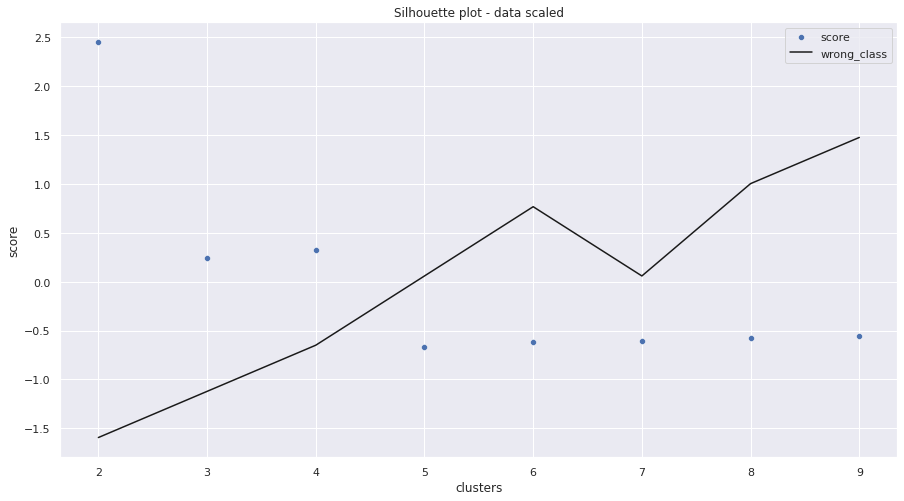

In [64]:
data_silhouette = pd.DataFrame({'score': silhouette_scores, 'wrong_class': wrong_values})
columns = data_silhouette.keys().tolist()

scaler = StandardScaler()

data_silhouette = scaler.fit_transform(data_silhouette)
data_silhouette = pd.DataFrame(data_silhouette, columns=columns) # perte des noms des colonnes apres standardisation
data_silhouette['clusters'] = [i for i in range(2,10)]
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data_silhouette, x='clusters', y='score', label='score')
sns.lineplot(data=data_silhouette, x='clusters', y='wrong_class', label='wrong_class', color='k')
#sns.lineplot(data=data_silhouette, x='clusters', y='diff', label='diff', color='green')
plt.legend()
plt.title("Silhouette plot - data scaled")
plt.show()

On remarque plusieurs choses :
- Les scores silhouette sont très faibles
- Le nombre d'individus mal classés est faible
- On a le choix entre 3 et 4 clusters

Ainsi, il faut trancher entre 3 et 4 clusters. Le score étant faible pour les deux, on va prendre 4 clusters qui est moins restrictif. Pour confirmer ou refuter ce choix, on effectuera un clustering agglomératif. C'est une technique de clustering hybride Hierarchical/K-means : 
1. On effectue un K-means avec volontairement plus de clusters que nécessaire
2. On calcule les centroïdes des clusters du K-means
3. On effectue un clustering agglomératif avec les centroïdes en entrée

In [65]:
# Première étape : K-means avec k = 4
clf = KMeans(n_clusters = 4, random_state=33)
clf.fit(data_study)
k_means_labels, k_means_centroids = clf.labels_, clf.cluster_centers_ 

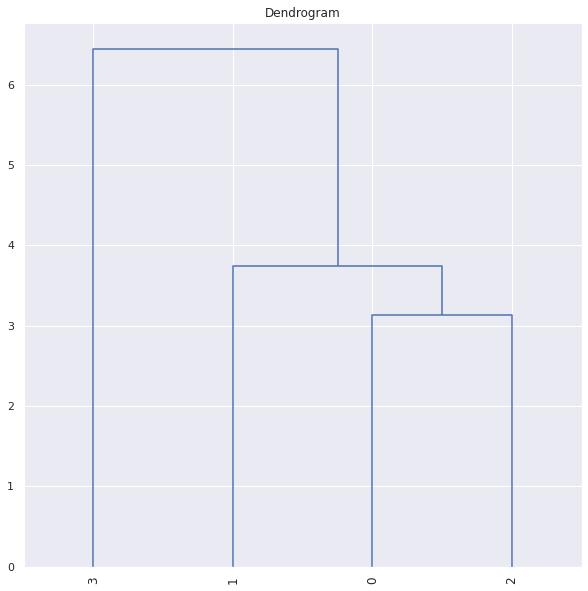

In [66]:
# Seconde étape : on regroupe les centroïdes 
Z = hierarchy.linkage(k_means_centroids, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(10, 10))
testtt = hierarchy.dendrogram(Z, leaf_rotation = 90., color_threshold = 0)
plt.title("Dendrogram")
plt.show()

On coupe à la moitié de la verticale plus longue (celle partant du 3). Cette coupure croise 3 lignes verticales. On a donc 3 clusters.

In [67]:
# fonction qui effectue un clustering agglomeratif 
def clustering(df1, n_clusters):
    # Input:
    #        - df1: pandas dataframe
    #        - n_clusters: number of clusters wanted. Type: int
    # Output:
    #        - cluster_labels: labels of the clusters. Type: array of int
    #        - centroids_: values of centroids. Type: array of int
    #X = df1.iloc[:].values
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit(df1)
    #y_predict = clusterer.fit(X)

    #clf = NearestCentroid()
    #clf.fit(df1, y_predict)

    return clusterer.labels_#, clf.centroids_

In [68]:
hierarch_labels = clustering(pd.DataFrame(k_means_centroids), 3)

On construit donc notre jeu de donnée résultant avec le label du cluster dans lequel le pays appartient.

In [69]:
final_labels = []

for lab_index in k_means_labels:
    final_labels.append(hierarch_labels[lab_index]) 

data_study['cluster'] = final_labels
data_study["country_year"] = new_list
data_study['country'] = countries
data_study['year'] = years
data_study.head()

,life_expectancy,adult_mortality,alcohol,hepatitis_b,measles,BMI,total_expenditure,GDP,population,schooling,cov_vaccin,thinness,infant_mortality,cluster,country_year,country,year
0,-1.017516,0.833875,-1.897046,-1.326068,0.888462,-1.453189,0.820780,-1.187806,0.762162,-0.640771,-2.384800,2.205131,1.988734,1,Afghanistan_2014,Afghanistan,2014
1,0.893409,-1.433695,0.266204,1.319246,-1.019997,0.849970,-0.034873,0.259424,-0.523938,0.741274,1.631475,-1.252412,-1.326369,2,Albania_2014,Albania,2014
2,0.689299,-0.843885,-1.384277,0.604381,-1.019997,0.893159,0.493631,0.389028,0.843066,0.796398,0.566284,0.781351,1.020185,0,Algeria_2014,Algeria,2014
3,-2.106099,1.300492,0.937730,-1.271775,1.863184,-1.051230,-1.524157,0.292828,0.649604,-0.124349,-2.141882,1.244019,2.072340,1,Angola_2014,Angola,2014
4,0.767709,-0.713611,0.881859,0.445401,-0.806653,1.024384,-0.566265,0.967950,0.891439,1.519542,0.137374,-1.611385,0.266548,0,Argentina_2014,Argentina,2014


Maintenant que nous avons retrouvé notre jeu de donnée initial avec l'ajout du cluster pour chaque *country_year*, nous allons examiner les clusters un à un.

In [70]:
# pays dans cluster 0
cluster = 0
data_study[data_study['cluster'] == cluster]['country'].unique()

array(['Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Belarus',
       'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Cabo Verde', 'China', 'Colombia', 'Costa Rica',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji',
       'Gabon', 'Georgia', 'Guatemala', 'Guyana', 'Honduras', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Kiribati', 'Latvia', 'Lebanon',
       'Lithuania', 'Malaysia', 'Maldives', 'Mauritius', 'Mexico',
       'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nicaragua',
       'Panama', 'Paraguay', 'Peru', 'Romania', 'Russian Federation',
       'Rwanda', 'Samoa', 'Sao Tome and Principe', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'Suriname', 'Swaziland',
       'Tajikistan', 'Thailand', 'Tonga', 'Trinidad and Tobago',
       'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uzbekistan',
       'Vanuatu'], dtype=object)

In [71]:
# pays dans cluster 1
cluster = 1
data_study[data_study['cluster'] == cluster]['country'].unique()

array(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Djibouti', 'Ethiopia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Kenya',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Pakistan',
       'Papua New Guinea', 'Philippines', 'Senegal', 'Sierra Leone',
       'South Africa', 'Timor-Leste', 'Togo', 'Uganda', 'Zambia',
       'Zimbabwe'], dtype=object)

In [72]:
# pays dans cluster 2
cluster = 2
data_study[data_study['cluster'] == cluster]['country'].unique()

array(['Albania', 'Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
       'Croatia', 'Cyprus', 'France', 'Germany', 'Greece', 'Ireland',
       'Israel', 'Italy', 'Luxembourg', 'Malta', 'Netherlands', 'Poland',
       'Portugal', 'Spain', 'Sweden', 'Uruguay'], dtype=object)

On obtient donc 3 clusters. Il ne reste plus qu'à comparer la corrélation globale avec la corrélation de chaque cluster. Pour cela, on va calculer la différence entre la matrice de corrélation du cluster et la matrice de corrélation initiale de toutes les données. Les valeurs positives indiquent que la corrélation de la variable est plus elevée, les valeurs négatives indiquent le contraire.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


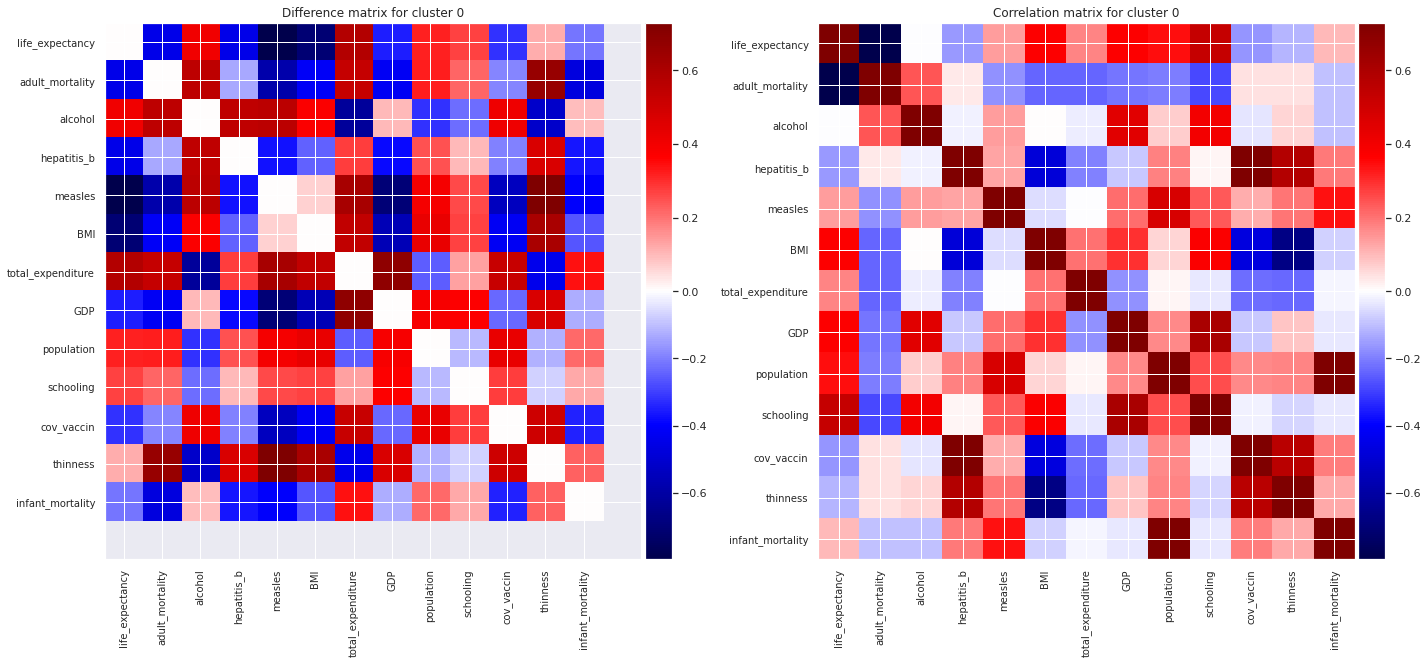

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


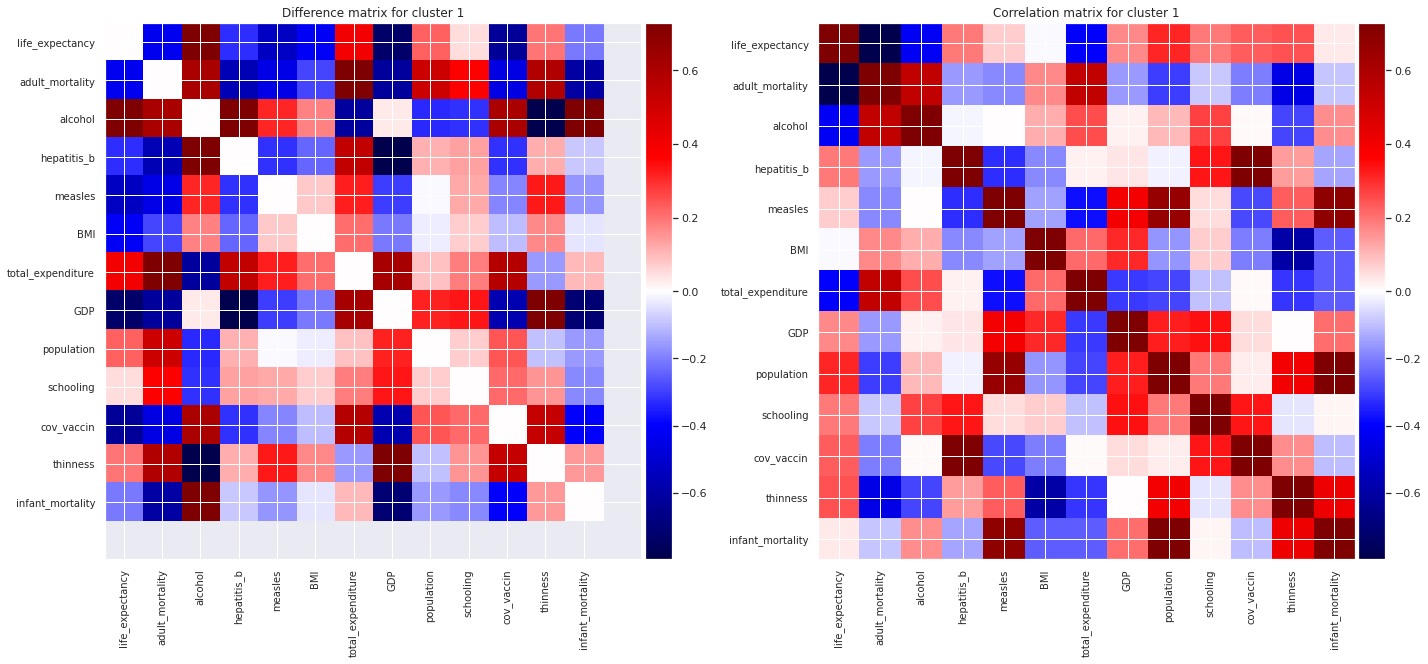

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


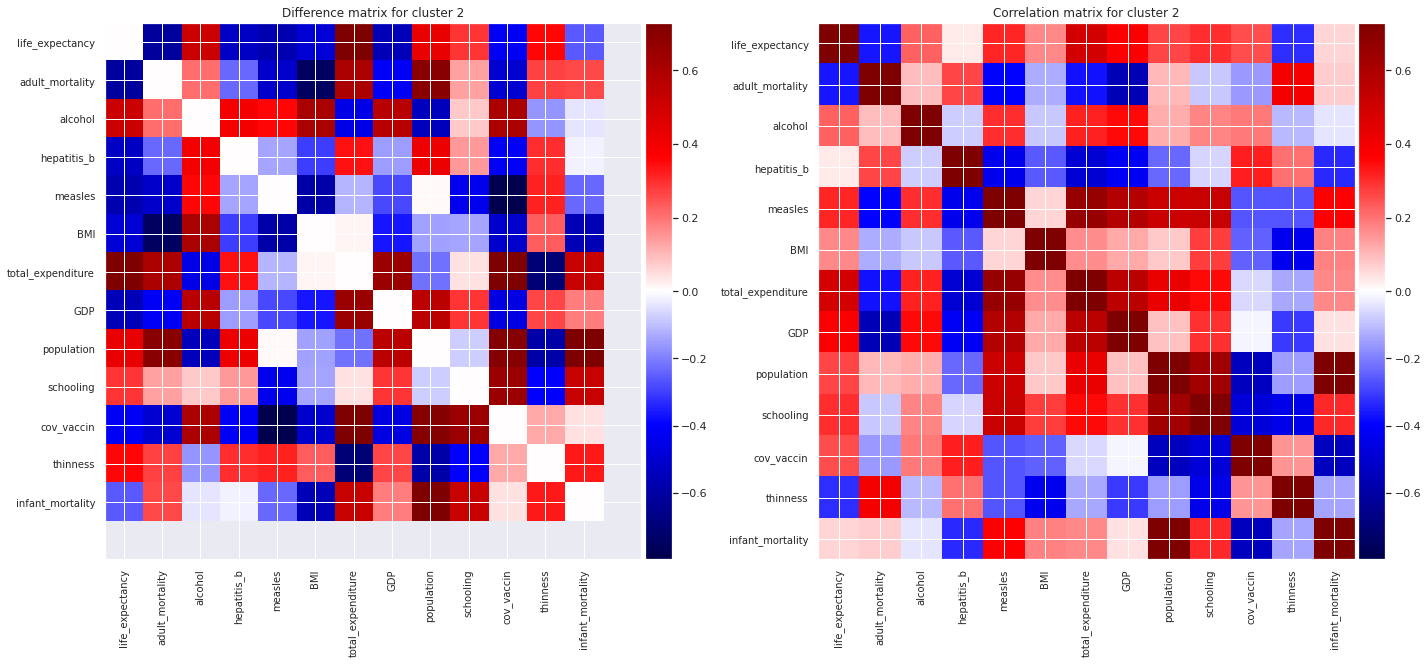

In [73]:
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vcenter=0.)


for cluster in range(3):
    data_matrix = data_study[data_study["cluster"] == cluster].drop(['cluster', 'year'], axis=1)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
    divider = make_axes_locatable(ax1)
    ax1.set_title("Difference matrix for cluster {}".format(cluster))
    cax = divider.append_axes('right', size='5%', pad=0.05)
    ax1.set_xticks(range(data_matrix.select_dtypes(['number']).shape[1]), data_matrix.select_dtypes(['number']).columns, fontsize=10, rotation=90)
    ax1.set_yticks(range(data_matrix.select_dtypes(['number']).shape[1]), data_matrix.select_dtypes(['number']).columns, fontsize=10)
    im1 = ax1.imshow(data_matrix.corr() - data_new[data_new['year'] == 2014].corr(), cmap='seismic',norm=divnorm)
    fig.colorbar(im1, cax=cax, orientation='vertical')
    #print("diffs")
    #print(data_matrix.corr() - data_num_new.corr())
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    ax2.set_title("Correlation matrix for cluster {}".format(cluster))
    ax2.set_xticks(range(data_matrix.select_dtypes(['number']).shape[1]), data_matrix.select_dtypes(['number']).columns, fontsize=10, rotation=90)
    ax2.set_yticks(range(data_matrix.select_dtypes(['number']).shape[1]), data_matrix.select_dtypes(['number']).columns, fontsize=10)
    im2 = ax2.imshow(data_matrix.corr(), cmap='seismic',norm=divnorm)
    fig.colorbar(im2, cax=cax, orientation='vertical')
    #print("correlations")
    #print(data_matrix.corr())
    plt.tight_layout()
    plt.show()

Commentaire (corrélations et différences selon *life_expectancy*):
- Cluster 0 : seulement *adult_mortality* est fortement corrélée. *cov_vaccin* et *infant_mortality* sont les deux variables qui ont le plus varié.
- Cluster 1 : seulement *adult_mortality* est fortement corrélée. *thinness*, *alcohol*, *total_expenditure* et *BMI* ont fortement varié. 
- Cluster 2 : il n'y a plus de variable fortement corrélée. Les variables *BMI*, *adult_mortality*, *infant_mortality* et *measles* ont varié fortement.

Visualisons les boxplots pour les variables ayant varié fortement. Ceci nous permettra d'identifier des caractéristiques sur les clusters.

<Figure size 720x360 with 0 Axes>

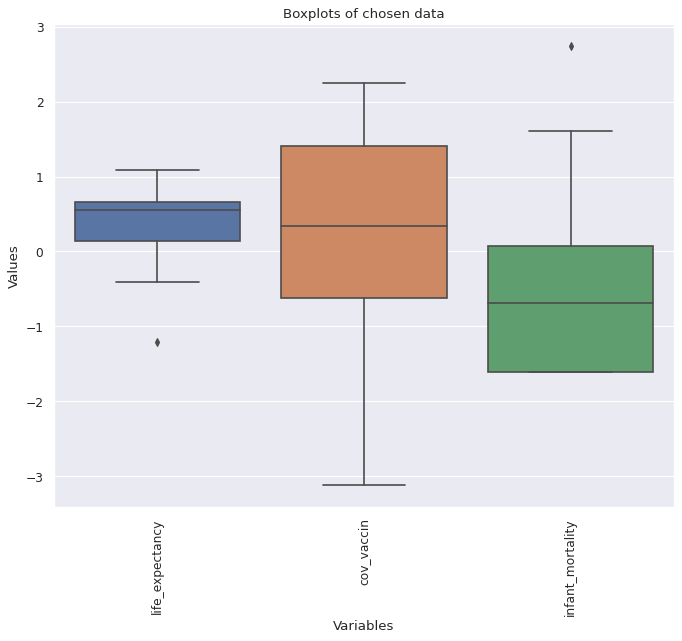

In [74]:
cluster = 0
plt.figure(figsize=(10, 5))
data_cluster = data_study[data_study["cluster"] == cluster][["life_expectancy", "cov_vaccin", "infant_mortality"]]
plot_boxplots(data_cluster)

Le cluster 0 a une espérance de vie légèrement plus haute que la moyenne. Les pays composant ce cluster ont une bonne couverture vaccinale (pour polio et diphtheria) en moyenne (avec assez de disparités) et le taux de mortalité infantile est plutôt bas. Cela semble bien correspondre aux pays se trouvant dans le cluster : 'Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan','Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cabo Verde', 'China', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Gabon', 'Georgia', 'Guatemala', 'Guyana', 'Honduras', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kiribati', 'Latvia', 'Lebanon', 'Lithuania', 'Malaysia', 'Maldives', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Romania', 'Russian Federation', 'Rwanda', 'Samoa', 'Sao Tome and Principe', 'Serbia', 'Seychelles', 'Solomon Islands', 'Sri Lanka', 'Suriname', 'Swaziland', 'Tajikistan', 'Thailand', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uzbekistan', 'Vanuatu'.

Ce sont des pays en voix de développement.

<Figure size 720x360 with 0 Axes>

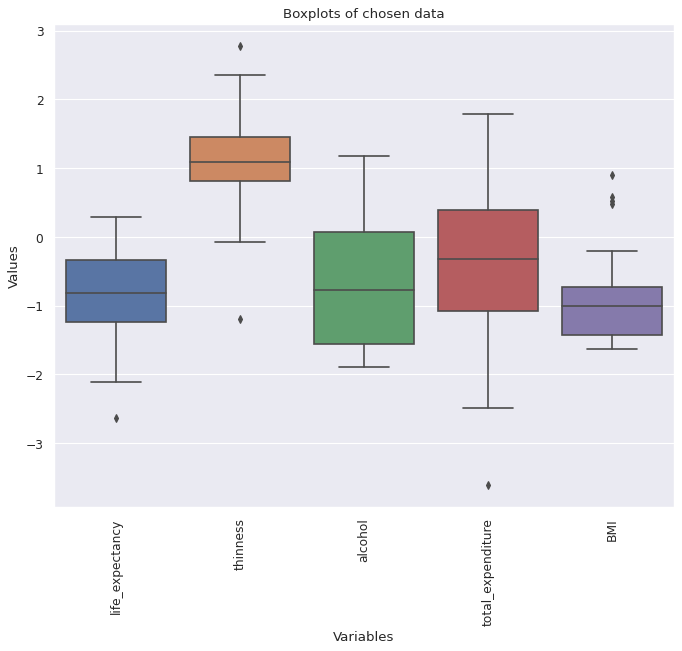

In [75]:
cluster = 1
plt.figure(figsize=(10, 5))
data_cluster = data_study[data_study["cluster"] == cluster][["life_expectancy", "thinness", "alcohol", "total_expenditure", "BMI"]]
plot_boxplots(data_cluster)

Le cluster 1 a une espérance de vie très faible. La population est très maigre (BMI faible le confirme) et la consommation d'alcool est faible. Ceci est potentiellement dû à l'accésibilité (financière et/ou questions religieuses) à l'alcool de ces pays. De plus, ils ne sont pas très investis dans la santé. Ceci correspond bien aux pays formant ce cluster : 'Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Djibouti', 'Ethiopia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Papua New Guinea', 'Philippines', 'Senegal', 'Sierra Leone', 'South Africa', 'Timor-Leste', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'

On retrouve des pays sous-développés.

<Figure size 720x360 with 0 Axes>

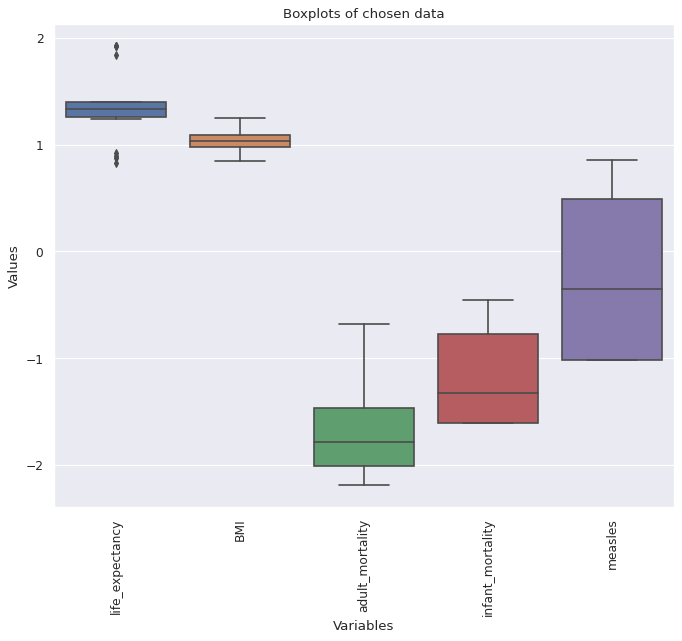

In [76]:
cluster = 2
plt.figure(figsize=(10, 5))
data_cluster = data_study[data_study["cluster"] == cluster][["life_expectancy", "BMI", "adult_mortality", "infant_mortality", "measles"]]
plot_boxplots(data_cluster)

Le cluster 2 a une espérance de vie très au dessus de la moyenne. L'indice de masse corporelle est lui aussi très élevé, c'est ce qu'on pourrait s'attendre des pays développés. Le taux de mortalité adult et infantile est très faible. Le nombre de cas de rougeole est plutôt faible dans la moyenne. Cela correspond parfaitement aux pays composant ce cluster : 'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Croatia', 'Cyprus', 'France', 'Germany', 'Greece', 'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Uruguay'

On a des pays développés.

Maintenant que l'on a caractérisé les clusters, il ne manque plus qu'à identifier quelles sont les variables, pour chaque cluster, qui ont la plus d'influence sur l'espérance de vie. (Assez long sur Python, voir le code R pour plus de claireté).

Commençons par le cluster 0.

In [77]:
cluster = 0
data_cluster = data_study[data_study["cluster"] == cluster].drop(["country_year", "year", "country", "cluster"], axis=1)
lm_1 = ols(ols_formula(data_cluster, 'life_expectancy'), data=data_cluster).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     29.93
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           3.97e-19
Time:                        00:50:03   Log-Likelihood:                 32.171
No. Observations:                  65   AIC:                            -38.34
Df Residuals:                      52   BIC:                            -10.07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1818      0.049      3.682      0.001       0.083       0.281
adult_mortality      -0.5284      0.044    -12.103      0.000      -0.616      -0.441
alcohol               0.0192      0.031      0.618      0.539      -0.043       0.081
hepatitis_b          -0.1780      0.127     -1.398      0.168      -0.434       0.078
measles              -0.0838      0.029     -2.924      0.005      -0.141      -0.026
BMI                  -0.0457      0.058     -0.791      0.433      -0.162       0.070
total_expenditure    -0.0208      0.029     -0.724      0.473      -0.078       0.037
GDP                  -0.0181      0.063     -0.286      0.776      -0.145       0.109
population            0.2815      0.059      4.770      0.000       0.163       0.400
schooling             0.1631      0.068      2.381      0.021       0.026       0.300
cov_vaccin            0.0745      0.084      0.885      0.380      -0.094       0.243
thinness             -0.0223      0.028     -0.783      0.437      -0.079       0.035
infant_mortality     -0.2061      0.057     -3.613      0.001      -0.321      -0.092
==============================================================================
Omnibus:                       11.650   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.484
Skew:                           0.661   Prob(JB):                     0.000263
Kurtosis:                       5.083   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le $R^2 = 0.871$ est plutôt bon. Les p-valeurs nous suggèrent de supprimer *GDP*.

In [78]:
lm_2 = ols(ols_formula(data_cluster, 'life_expectancy', 'GDP'), data=data_cluster).fit()
anova_lm(lm_2, lm_1) # 0.89 on ne rejette pas lm_2
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     33.22
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           6.95e-20
Time:                        00:50:03   Log-Likelihood:                 32.120
No. Observations:                  65   AIC:                            -40.24
Df Residuals:                      53   BIC:                            -14.15
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1778      0.047      3.783      0.000       0.084       0.272
adult_mortality      -0.5254      0.042    -12.497      0.000      -0.610      -0.441
alcohol               0.0156      0.028      0.554      0.582      -0.041       0.072
hepatitis_b          -0.1713      0.124     -1.380      0.173      -0.420       0.078
measles              -0.0843      0.028     -2.973      0.004      -0.141      -0.027
BMI                  -0.0509      0.054     -0.936      0.354      -0.160       0.058
total_expenditure    -0.0187      0.028     -0.679      0.500      -0.074       0.037
population            0.2835      0.058      4.883      0.000       0.167       0.400
schooling             0.1560      0.063      2.464      0.017       0.029       0.283
cov_vaccin            0.0711      0.083      0.861      0.393      -0.095       0.237
thinness             -0.0252      0.026     -0.954      0.344      -0.078       0.028
infant_mortality     -0.2079      0.056     -3.698      0.001      -0.321      -0.095
==============================================================================
Omnibus:                       10.791   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.955
Skew:                           0.615   Prob(JB):                     0.000566
Kurtosis:                       5.002   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On conserve le même $R^2$. Les p-valeurs nous suggèrent de supprimer *alcohol*.

In [79]:
lm_3 = ols(ols_formula(data_cluster, 'life_expectancy', 'GDP', 'alcohol'), data=data_cluster).fit()
anova_lm(lm_3,lm_2) # 0.69 on ne rejette pas lm_3
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     36.99
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.28e-20
Time:                        00:50:03   Log-Likelihood:                 31.932
No. Observations:                  65   AIC:                            -41.86
Df Residuals:                      54   BIC:                            -17.95
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1771      0.047      3.793      0.000       0.083       0.271
adult_mortality      -0.5159      0.038    -13.530      0.000      -0.592      -0.439
hepatitis_b          -0.1709      0.123     -1.386      0.172      -0.418       0.076
measles              -0.0833      0.028     -2.964      0.005      -0.140      -0.027
BMI                  -0.0553      0.054     -1.034      0.306      -0.163       0.052
total_expenditure    -0.0172      0.027     -0.633      0.530      -0.072       0.037
population            0.2883      0.057      5.052      0.000       0.174       0.403
schooling             0.1694      0.058      2.915      0.005       0.053       0.286
cov_vaccin            0.0696      0.082      0.848      0.400      -0.095       0.234
thinness             -0.0252      0.026     -0.961      0.341      -0.078       0.027
infant_mortality     -0.2130      0.055     -3.865      0.000      -0.323      -0.103
==============================================================================
Omnibus:                       12.749   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.151
Skew:                           0.672   Prob(JB):                     4.21e-05
Kurtosis:                       5.374   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le $R^2$ est toujours le même. On peut essayer de supprimer *total_expenditure*.

In [80]:
lm_4 = ols(ols_formula(data_cluster, 'life_expectancy', 'GDP', 'alcohol', 'total_expenditure'), data=data_cluster).fit()
anova_lm(lm_4, lm_3) # 0.616 on ne rejette pas lm_4
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     41.51
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           2.34e-21
Time:                        00:50:03   Log-Likelihood:                 31.692
No. Observations:                  65   AIC:                            -43.38
Df Residuals:                      55   BIC:                            -21.64
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1787      0.046      3.853      0.000       0.086       0.272
adult_mortality     -0.5101      0.037    -13.861      0.000      -0.584      -0.436
hepatitis_b         -0.1841      0.121     -1.524      0.133      -0.426       0.058
measles             -0.0834      0.028     -2.981      0.004      -0.139      -0.027
BMI                 -0.0561      0.053     -1.055      0.296      -0.163       0.050
population           0.2837      0.056      5.040      0.000       0.171       0.397
schooling            0.1770      0.057      3.130      0.003       0.064       0.290
cov_vaccin           0.0792      0.080      0.989      0.327      -0.081       0.240
thinness            -0.0227      0.026     -0.882      0.381      -0.074       0.029
infant_mortality    -0.2086      0.054     -3.837      0.000      -0.318      -0.100
==============================================================================
Omnibus:                       13.598   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.515
Skew:                           0.635   Prob(JB):                     2.88e-06
Kurtosis:                       5.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le $R^2$ descend légèrement. On supprime la variable *thinness*.

In [81]:
lm_5 = ols(ols_formula(data_cluster, 'life_expectancy', 'GDP', 'alcohol', 'total_expenditure', 'thinness'), data=data_cluster).fit()
anova_lm(lm_5, lm_4) # 0.52 on ne rejette pas lm_5
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     46.79
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           4.81e-22
Time:                        00:50:03   Log-Likelihood:                 31.235
No. Observations:                  65   AIC:                            -44.47
Df Residuals:                      56   BIC:                            -24.90
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1762      0.046      3.815      0.000       0.084       0.269
adult_mortality     -0.5080      0.037    -13.860      0.000      -0.581      -0.435
hepatitis_b         -0.1914      0.120     -1.591      0.117      -0.432       0.050
measles             -0.0841      0.028     -3.015      0.004      -0.140      -0.028
BMI                 -0.0281      0.043     -0.660      0.512      -0.114       0.057
population           0.2673      0.053      5.041      0.000       0.161       0.374
schooling            0.1789      0.056      3.171      0.002       0.066       0.292
cov_vaccin           0.0783      0.080      0.979      0.332      -0.082       0.239
infant_mortality    -0.1940      0.052     -3.754      0.000      -0.297      -0.090
==============================================================================
Omnibus:                       11.566   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               19.252
Skew:                           0.569   Prob(JB):                     6.60e-05
Kurtosis:                       5.411   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le $R^2$ descend légèrement. On supprime la variable *BMI*.

In [82]:
lm_6 = ols(ols_formula(data_cluster, 'life_expectancy', 'GDP', 'alcohol', 'total_expenditure', 'thinness', 'BMI'), data=data_cluster).fit()
anova_lm(lm_6, lm_5) # 0.47 on ne rejette pas lm_6
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     53.94
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           7.77e-23
Time:                        00:50:03   Log-Likelihood:                 30.983
No. Observations:                  65   AIC:                            -45.97
Df Residuals:                      57   BIC:                            -28.57
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1635      0.042      3.913      0.000       0.080       0.247
adult_mortality     -0.5043      0.036    -13.998      0.000      -0.576      -0.432
hepatitis_b         -0.1751      0.117     -1.494      0.141      -0.410       0.060
measles             -0.0811      0.027     -2.961      0.004      -0.136      -0.026
population           0.2641      0.053      5.026      0.000       0.159       0.369
schooling            0.1668      0.053      3.142      0.003       0.060       0.273
cov_vaccin           0.0734      0.079      0.926      0.358      -0.085       0.232
infant_mortality    -0.1922      0.051     -3.744      0.000      -0.295      -0.089
==============================================================================
Omnibus:                       11.248   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               17.885
Skew:                           0.572   Prob(JB):                     0.000131
Kurtosis:                       5.301   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le $R^2$ descend légèrement. On supprime la variable *cov_vaccin*.

In [83]:
lm_7 = ols(ols_formula(data_cluster, 'life_expectancy', 'GDP', 'alcohol', 'total_expenditure', 'thinness', 'BMI', 'cov_vaccin'), data=data_cluster).fit()
anova_lm(lm_7, lm_6) # 0.37 on ne rejette pas lm_7
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     62.94
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.42e-23
Time:                        00:50:03   Log-Likelihood:                 30.498
No. Observations:                  65   AIC:                            -47.00
Df Residuals:                      58   BIC:                            -31.78
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1432      0.035      4.034      0.000       0.072       0.214
adult_mortality     -0.5038      0.036    -14.003      0.000      -0.576      -0.432
hepatitis_b         -0.0686      0.022     -3.053      0.003      -0.114      -0.024
measles             -0.0814      0.027     -2.977      0.004      -0.136      -0.027
population           0.2643      0.052      5.037      0.000       0.159       0.369
schooling            0.1603      0.053      3.050      0.003       0.055       0.266
infant_mortality    -0.1924      0.051     -3.751      0.000      -0.295      -0.090
==============================================================================
Omnibus:                       11.362   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               18.052
Skew:                           0.580   Prob(JB):                     0.000120
Kurtosis:                       5.306   Cond. No.                         6.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Les p-valeurs ne suggèrent plus de supprimer des variables. On compare ce modèle avec le modèle complet.

In [84]:
anova_lm(lm_7, lm_1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,58.0,1.488991,0.0,NaN,NaN,NaN
1,52.0,1.414300,6.0,0.07469,0.457692,0.836233


La p-valeur est 0.836 bien au-dessus du risque $\alpha = 0.05$. On ne rejette donc pas le modèle simplifié.

Le $R^2$ du modèle est égal à $0.867$. Les variables expliquant le mieux l'espérance de vie sont : 
- *adult_mortality*
- *population*
- *infant_mortality*

La première est la variable la plus corrélée à l'espérance de vie. La deuxième montre bien que, dans ces pays, comme le taux de mortalité adulte et infantile est élevé, plus la population est grande, plus l'espérance de vie a des chances de diminuer. La troisième est celle dont la corrélation a le plus varié lorsque l'on a séparé les données en clusters. Le modèle confirme bien les résultats précédents.

Analysons maintenant le cluster 1.

In [85]:
cluster = 1
data_cluster = data_study[data_study["cluster"] == cluster].drop(["country_year", "year", "country", "cluster"], axis=1)
lm_1 = ols(ols_formula(data_cluster, 'life_expectancy'), data=data_cluster).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     26.31
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.21e-12
Time:                        00:50:03   Log-Likelihood:                 10.175
No. Observations:                  43   AIC:                             5.651
Df Residuals:                      30   BIC:                             28.55
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1352      0.160      0.847      0.404      -0.191       0.461
adult_mortality      -0.7822      0.128     -6.111      0.000      -1.044      -0.521
alcohol              -0.0023      0.055     -0.041      0.967      -0.115       0.111
hepatitis_b           0.1734      0.381      0.455      0.653      -0.606       0.953
measles              -0.0801      0.060     -1.342      0.190      -0.202       0.042
BMI                  -0.0242      0.087     -0.277      0.783      -0.202       0.154
total_expenditure    -0.0236      0.043     -0.548      0.588      -0.111       0.064
GDP                  -0.0613      0.080     -0.766      0.450      -0.225       0.102
population            0.9895      0.218      4.545      0.000       0.545       1.434
schooling            -0.0416      0.065     -0.644      0.524      -0.174       0.090
cov_vaccin           -0.1524      0.275     -0.554      0.584      -0.714       0.409
thinness             -0.1183      0.081     -1.461      0.154      -0.284       0.047
infant_mortality     -0.6239      0.163     -3.824      0.001      -0.957      -0.291
==============================================================================
Omnibus:                        4.769   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                5.270
Skew:                           0.141   Prob(JB):                       0.0717
Kurtosis:                       4.691   Cond. No.                         46.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le $R^2$ est plutôt très bon. Les p-valeurs nous suggèrent du supprimer *alcohol*.

In [86]:
lm_2 = ols(ols_formula(data_cluster, 'life_expectancy', 'alcohol'), data=data_cluster).fit()
anova_lm(lm_2, lm_1) # 0.96 on ne rejette pas lm_2
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     29.65
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           2.15e-13
Time:                        00:50:03   Log-Likelihood:                 10.173
No. Observations:                  43   AIC:                             3.653
Df Residuals:                      31   BIC:                             24.79
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1363      0.155      0.880      0.386      -0.180       0.452
adult_mortality      -0.7844      0.114     -6.868      0.000      -1.017      -0.552
hepatitis_b           0.1792      0.349      0.514      0.611      -0.532       0.891
measles              -0.0798      0.058     -1.371      0.180      -0.199       0.039
BMI                  -0.0243      0.086     -0.284      0.779      -0.199       0.151
total_expenditure    -0.0234      0.042     -0.556      0.582      -0.109       0.063
GDP                  -0.0612      0.079     -0.777      0.443      -0.222       0.099
population            0.9896      0.214      4.620      0.000       0.553       1.426
schooling            -0.0425      0.060     -0.712      0.482      -0.164       0.079
cov_vaccin           -0.1566      0.251     -0.624      0.537      -0.669       0.356
thinness             -0.1178      0.079     -1.493      0.146      -0.279       0.043
infant_mortality     -0.6245      0.160     -3.910      0.000      -0.950      -0.299
==============================================================================
Omnibus:                        4.789   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                5.329
Skew:                           0.136   Prob(JB):                       0.0696
Kurtosis:                       4.703   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On peut supprimer *BMI*.

In [87]:
lm_3 = ols(ols_formula(data_cluster, 'life_expectancy', 'alcohol', "BMI"), data=data_cluster).fit()
anova_lm(lm_3, lm_2) # 0.77 on ne rejette pas lm_3
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     33.57
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           3.72e-14
Time:                        00:50:03   Log-Likelihood:                 10.118
No. Observations:                  43   AIC:                             1.765
Df Residuals:                      32   BIC:                             21.14
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1389      0.152      0.912      0.368      -0.171       0.449
adult_mortality      -0.7824      0.112     -6.965      0.000      -1.011      -0.554
hepatitis_b           0.1685      0.342      0.493      0.625      -0.528       0.865
measles              -0.0761      0.056     -1.361      0.183      -0.190       0.038
total_expenditure    -0.0255      0.041     -0.623      0.538      -0.109       0.058
GDP                  -0.0709      0.070     -1.015      0.318      -0.213       0.071
population            0.9785      0.208      4.714      0.000       0.556       1.401
schooling            -0.0409      0.059     -0.698      0.490      -0.160       0.078
cov_vaccin           -0.1451      0.244     -0.594      0.557      -0.643       0.352
thinness             -0.1065      0.067     -1.587      0.122      -0.243       0.030
infant_mortality     -0.6179      0.156     -3.968      0.000      -0.935      -0.301
==============================================================================
Omnibus:                        4.771   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                5.356
Skew:                           0.115   Prob(JB):                       0.0687
Kurtosis:                       4.713   Cond. No.                         40.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On peut supprimer *hepatitis_b*.

In [88]:
lm_4 = ols(ols_formula(data_cluster, 'life_expectancy', 'alcohol', "BMI", 'hepatitis_b'), data=data_cluster).fit()
anova_lm(lm_4, lm_3) # 0.62 on ne rejette pas lm_4
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     38.15
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           6.52e-15
Time:                        00:50:04   Log-Likelihood:                 9.9550
No. Observations:                  43   AIC:                           0.09006
Df Residuals:                      33   BIC:                             17.70
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1831      0.122      1.504      0.142      -0.065       0.431
adult_mortality      -0.7772      0.111     -7.030      0.000      -1.002      -0.552
measles              -0.0809      0.054     -1.487      0.147      -0.192       0.030
total_expenditure    -0.0275      0.040     -0.684      0.499      -0.109       0.054
GDP                  -0.0686      0.069     -0.996      0.326      -0.209       0.072
population            0.9626      0.203      4.750      0.000       0.550       1.375
schooling            -0.0373      0.057     -0.648      0.521      -0.154       0.080
cov_vaccin           -0.0263      0.040     -0.660      0.514      -0.108       0.055
thinness             -0.1057      0.066     -1.594      0.120      -0.241       0.029
infant_mortality     -0.6090      0.153     -3.983      0.000      -0.920      -0.298
==============================================================================
Omnibus:                        4.852   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                5.683
Skew:                           0.043   Prob(JB):                       0.0584
Kurtosis:                       4.779   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On supprime *schooling*.

In [89]:
lm_5 = ols(ols_formula(data_cluster, 'life_expectancy', 'alcohol', "BMI", 'hepatitis_b', 'schooling'), data=data_cluster).fit()
anova_lm(lm_5, lm_4) # 0.52 on ne rejette pas lm_5
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     43.61
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.16e-15
Time:                        00:50:04   Log-Likelihood:                 9.6827
No. Observations:                  43   AIC:                            -1.365
Df Residuals:                      34   BIC:                             14.49
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1895      0.120      1.576      0.124      -0.055       0.434
adult_mortality      -0.8022      0.103     -7.805      0.000      -1.011      -0.593
measles              -0.0834      0.054     -1.549      0.131      -0.193       0.026
total_expenditure    -0.0222      0.039     -0.569      0.573      -0.102       0.057
GDP                  -0.0732      0.068     -1.077      0.289      -0.211       0.065
population            0.9002      0.177      5.091      0.000       0.541       1.259
cov_vaccin           -0.0328      0.038     -0.856      0.398      -0.111       0.045
thinness             -0.1082      0.066     -1.649      0.108      -0.242       0.025
infant_mortality     -0.5639      0.135     -4.177      0.000      -0.838      -0.290
==============================================================================
Omnibus:                        6.479   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                9.783
Skew:                           0.120   Prob(JB):                      0.00751
Kurtosis:                       5.324   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On supprime *total_expenditure*.

In [90]:
lm_6 = ols(ols_formula(data_cluster, 'life_expectancy', 'alcohol', "BMI", 'hepatitis_b', 'schooling', 'total_expenditure'), data=data_cluster).fit()
anova_lm(lm_6, lm_5) # 0.57 on ne rejette pas lm_6
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     50.78
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.83e-16
Time:                        00:50:04   Log-Likelihood:                 9.4791
No. Observations:                  43   AIC:                            -2.958
Df Residuals:                      35   BIC:                             11.13
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2121      0.112      1.885      0.068      -0.016       0.440
adult_mortality     -0.8336      0.086     -9.713      0.000      -1.008      -0.659
measles             -0.0797      0.053     -1.506      0.141      -0.187       0.028
GDP                 -0.0621      0.064     -0.964      0.342      -0.193       0.069
population           0.8664      0.165      5.254      0.000       0.532       1.201
cov_vaccin          -0.0326      0.038     -0.859      0.396      -0.110       0.044
thinness            -0.1099      0.065     -1.692      0.100      -0.242       0.022
infant_mortality    -0.5391      0.127     -4.261      0.000      -0.796      -0.282
==============================================================================
Omnibus:                        8.720   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               16.978
Skew:                           0.239   Prob(JB):                     0.000206
Kurtosis:                       6.041   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On supprime *cov_vaccin*.

In [91]:
lm_7 = ols(ols_formula(data_cluster, 'life_expectancy', 'alcohol', "BMI", 'hepatitis_b', 'schooling', 'total_expenditure', 'cov_vaccin'), data=data_cluster).fit()
anova_lm(lm_7, lm_6) # 0.39 on ne rejette pas lm_7
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     59.55
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           3.22e-17
Time:                        00:50:04   Log-Likelihood:                 9.0309
No. Observations:                  43   AIC:                            -4.062
Df Residuals:                      36   BIC:                             8.267
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2409      0.107      2.252      0.031       0.024       0.458
adult_mortality     -0.8354      0.085     -9.772      0.000      -1.009      -0.662
measles             -0.0645      0.050     -1.298      0.203      -0.165       0.036
GDP                 -0.0673      0.064     -1.052      0.300      -0.197       0.062
population           0.8287      0.158      5.232      0.000       0.507       1.150
thinness            -0.1205      0.064     -1.897      0.066      -0.249       0.008
infant_mortality    -0.5163      0.123     -4.189      0.000      -0.766      -0.266
==============================================================================
Omnibus:                       10.714   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               24.237
Skew:                           0.361   Prob(JB):                     5.46e-06
Kurtosis:                       6.607   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On supprime *GDP*.

In [92]:
lm_8 = ols(ols_formula(data_cluster, 'life_expectancy', 'alcohol', "BMI", 'hepatitis_b', 'schooling', 'total_expenditure', 'cov_vaccin', 'GDP'), data=data_cluster).fit()
anova_lm(lm_8, lm_7) # 0.29 on ne rejette pas lm_8
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     71.04
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           6.18e-18
Time:                        00:50:04   Log-Likelihood:                 8.3800
No. Observations:                  43   AIC:                            -4.760
Df Residuals:                      37   BIC:                             5.807
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2766      0.102      2.724      0.010       0.071       0.482
adult_mortality     -0.8459      0.085     -9.949      0.000      -1.018      -0.674
measles             -0.0827      0.047     -1.772      0.085      -0.177       0.012
population           0.7707      0.149      5.183      0.000       0.469       1.072
thinness            -0.1190      0.064     -1.871      0.069      -0.248       0.010
infant_mortality    -0.4736      0.117     -4.064      0.000      -0.710      -0.237
==============================================================================
Omnibus:                       13.274   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               35.692
Skew:                           0.489   Prob(JB):                     1.78e-08
Kurtosis:                       7.355   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On supprime *measles*.

In [93]:
lm_9 = ols(ols_formula(data_cluster, 'life_expectancy', 'alcohol', "BMI", 'hepatitis_b', 'schooling', 'total_expenditure', 'cov_vaccin', 'GDP', 'measles'), data=data_cluster).fit()
anova_lm(lm_9, lm_8) # 0.08 on ne rejette pas lm_9
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     83.32
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           2.81e-18
Time:                        00:50:04   Log-Likelihood:                 6.6291
No. Observations:                  43   AIC:                            -3.258
Df Residuals:                      38   BIC:                             5.548
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2735      0.104      2.621      0.013       0.062       0.485
adult_mortality     -0.8131      0.085     -9.534      0.000      -0.986      -0.640
population           0.7898      0.152      5.181      0.000       0.481       1.098
thinness            -0.0988      0.064     -1.536      0.133      -0.229       0.031
infant_mortality    -0.5420      0.113     -4.796      0.000      -0.771      -0.313
==============================================================================
Omnibus:                       10.385   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               25.421
Skew:                          -0.240   Prob(JB):                     3.02e-06
Kurtosis:                       6.736   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On supprime la variable *thinness*.

In [94]:
lm_10 = ols(ols_formula(data_cluster, 'life_expectancy', 'alcohol', "BMI", 'hepatitis_b', 'schooling', 'total_expenditure', 'cov_vaccin', 'GDP', 'measles', 'thinness'), data=data_cluster).fit()
anova_lm(lm_10, lm_9) # 0.13 on ne rejette pas lm_10
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     106.6
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           7.74e-19
Time:                        00:50:04   Log-Likelihood:                 5.3339
No. Observations:                  43   AIC:                            -2.668
Df Residuals:                      39   BIC:                             4.377
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1743      0.083      2.090      0.043       0.006       0.343
adult_mortality     -0.7446      0.074    -10.068      0.000      -0.894      -0.595
population           0.8591      0.148      5.801      0.000       0.560       1.159
infant_mortality    -0.6118      0.105     -5.813      0.000      -0.825      -0.399
==============================================================================
Omnibus:                       11.472   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               19.762
Skew:                          -0.621   Prob(JB):                     5.11e-05
Kurtosis:                       6.080   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Les p-valeurs ne nous suggèrent plus de supprimer des variables. Il ne reste plus qu'à comparer le modèle obtenu avec le modèle complet.

In [95]:
anova_lm(lm_10, lm_1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,39.0,1.964496,0.0,NaN,NaN,NaN
1,30.0,1.568447,9.0,0.396049,0.841701,0.584578


La p-valeur est 0.58 bien au-dessus du risque $\alpha = 0.05$. On ne rejette donc pas le modèle simplifié.

Le $R^2$ du modèle est égal à $0.891$. Les variables expliquant le mieux l'espérance de vie sont : 
- *adult_mortality*
- *population*
- *infant_mortality*

Dans ce modèle, on voit carrément le modèle précédent mais à l'extrême. Les influences des trois variables ont drastiquement augmenté. En considérant que les pays formant ce cluster sont des pays sous-développés, cela est logique.

Analysons maintenant le cluster 2.

In [96]:
cluster = 2
data_cluster = data_study[data_study["cluster"] == cluster].drop(["country_year", "year", "country", "cluster"], axis=1)
lm_1 = ols(ols_formula(data_cluster, 'life_expectancy'), data=data_cluster).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.042
Date:                Fri, 21 Jan 2022   Prob (F-statistic):              0.486
Time:                        00:50:04   Log-Likelihood:                 3.8958
No. Observations:                  22   AIC:                             18.21
Df Residuals:                       9   BIC:                             32.39
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2446      1.064     -0.230      0.823      -2.651       2.162
adult_mortality      -0.0876      0.260     -0.337      0.744      -0.677       0.501
alcohol              -0.0271      0.231     -0.117      0.909      -0.550       0.496
hepatitis_b           0.1349      0.134      1.003      0.342      -0.169       0.439
measles              -0.0420      0.162     -0.260      0.801      -0.408       0.324
BMI                   0.5119      0.909      0.563      0.587      -1.545       2.568
total_expenditure     0.2141      0.254      0.843      0.421      -0.360       0.788
GDP                   0.1359      0.218      0.623      0.549      -0.357       0.629
population            0.2131      0.262      0.813      0.437      -0.380       0.807
schooling            -0.0418      0.384     -0.109      0.916      -0.911       0.828
cov_vaccin            0.1701      0.138      1.233      0.249      -0.142       0.482
thinness             -0.1039      0.150     -0.691      0.507      -0.444       0.236
infant_mortality     -0.0570      0.375     -0.152      0.882      -0.904       0.790
==============================================================================
Omnibus:                        2.008   Durbin-Watson:                   2.555
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.237
Skew:                           0.581   Prob(JB):                        0.539
Kurtosis:                       2.973   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On a un $R^2$ très faible de base. On peut supprimer *schooling*.

In [97]:
lm_2 = ols(ols_formula(data_cluster, 'life_expectancy', 'schooling'), data=data_cluster).fit()
anova_lm(lm_2, lm_1) # 0.92 on ne rejette pas lm_2
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     1.261
Date:                Fri, 21 Jan 2022   Prob (F-statistic):              0.361
Time:                        00:50:04   Log-Likelihood:                 3.8813
No. Observations:                  22   AIC:                             16.24
Df Residuals:                      10   BIC:                             29.33
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2300      1.002     -0.230      0.823      -2.462       2.002
adult_mortality      -0.0888      0.247     -0.360      0.727      -0.639       0.461
alcohol              -0.0276      0.219     -0.126      0.902      -0.516       0.461
hepatitis_b           0.1299      0.120      1.083      0.304      -0.137       0.397
measles              -0.0472      0.147     -0.322      0.754      -0.374       0.279
BMI                   0.4801      0.817      0.587      0.570      -1.341       2.301
total_expenditure     0.2178      0.239      0.912      0.383      -0.315       0.750
GDP                   0.1303      0.201      0.648      0.532      -0.318       0.579
population            0.1965      0.202      0.973      0.354      -0.254       0.647
cov_vaccin            0.1755      0.123      1.432      0.183      -0.098       0.449
thinness             -0.0986      0.135     -0.730      0.482      -0.400       0.202
infant_mortality     -0.0364      0.307     -0.119      0.908      -0.721       0.648
==============================================================================
Omnibus:                        2.083   Durbin-Watson:                   2.525
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.320
Skew:                           0.600   Prob(JB):                        0.517
Kurtosis:                       2.950   Cond. No.                         79.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La prochaine variable que l'on va supprimer est *infant_mortality*.

In [98]:
lm_3 = ols(ols_formula(data_cluster, 'life_expectancy', 'schooling', 'infant_mortality'), data=data_cluster).fit()
anova_lm(lm_3, lm_2) # 0.91 on ne rejette pas lm_3
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     1.522
Date:                Fri, 21 Jan 2022   Prob (F-statistic):              0.250
Time:                        00:50:04   Log-Likelihood:                 3.8658
No. Observations:                  22   AIC:                             14.27
Df Residuals:                      11   BIC:                             26.27
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1747      0.846     -0.206      0.840      -2.037       1.687
adult_mortality      -0.0859      0.234     -0.366      0.721      -0.602       0.430
alcohol              -0.0262      0.209     -0.125      0.903      -0.486       0.434
hepatitis_b           0.1355      0.105      1.286      0.225      -0.096       0.367
measles              -0.0487      0.139     -0.349      0.734      -0.355       0.258
BMI                   0.4567      0.757      0.604      0.558      -1.209       2.122
total_expenditure     0.2310      0.201      1.147      0.276      -0.212       0.675
GDP                   0.1293      0.192      0.674      0.514      -0.293       0.551
population            0.1782      0.125      1.431      0.180      -0.096       0.452
cov_vaccin            0.1745      0.117      1.496      0.163      -0.082       0.431
thinness             -0.1015      0.127     -0.799      0.441      -0.381       0.178
==============================================================================
Omnibus:                        1.802   Durbin-Watson:                   2.527
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.181
Skew:                           0.564   Prob(JB):                        0.554
Kurtosis:                       2.880   Cond. No.                         68.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Supprimons l'intercept.

In [99]:
lm_4 = ols(ols_formula(data_cluster, 'life_expectancy', 'schooling', 'infant_mortality') + '-1', data=data_cluster).fit()
anova_lm(lm_4, lm_3) # 0.909 on ne rejette pas lm_4
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              54.43
Date:                Fri, 21 Jan 2022   Prob (F-statistic):                    1.96e-08
Time:                        00:50:04   Log-Likelihood:                          3.8233
No. Observations:                  22   AIC:                                      12.35
Df Residuals:                      12   BIC:                                      23.26
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
adult_mortality      -0.0690      0.211     -0.327      0.749      -0.528       0.390
alcohol              -0.0394      0.191     -0.207      0.840      -0.455       0.376
hepatitis_b           0.1308      0.099      1.325      0.210      -0.084       0.346
measles              -0.0433      0.131     -0.330      0.747      -0.330       0.243
BMI                   0.3235      0.380      0.852      0.411      -0.503       1.150
total_expenditure     0.2360      0.192      1.230      0.242      -0.182       0.654
GDP                   0.1250      0.183      0.683      0.507      -0.274       0.524
population            0.1716      0.116      1.486      0.163      -0.080       0.423
cov_vaccin            0.1718      0.111      1.545      0.148      -0.071       0.414
thinness             -0.1101      0.115     -0.958      0.357      -0.361       0.140
==============================================================================
Omnibus:                        1.756   Durbin-Watson:                   2.517
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.210
Skew:                           0.568   Prob(JB):                        0.546
Kurtosis:                       2.820   Cond. No.                         26.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le $R^2$ est devenu très élevé d'un coup. On peut supprimer *alcohol*.

In [100]:
lm_5 = ols(ols_formula(data_cluster, 'life_expectancy', 'schooling', 'infant_mortality', 'alcohol') + '-1', data=data_cluster).fit()
anova_lm(lm_5, lm_4) # 0.83 on ne rejette pas lm_5
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              65.28
Date:                Fri, 21 Jan 2022   Prob (F-statistic):                    2.36e-09
Time:                        00:50:04   Log-Likelihood:                          3.7843
No. Observations:                  22   AIC:                                      10.43
Df Residuals:                      13   BIC:                                      20.25
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
adult_mortality      -0.0890      0.180     -0.493      0.630      -0.478       0.301
hepatitis_b           0.1287      0.094      1.362      0.196      -0.075       0.333
measles              -0.0474      0.125     -0.380      0.710      -0.317       0.223
BMI                   0.3000      0.348      0.861      0.405      -0.453       1.053
total_expenditure     0.2317      0.184      1.262      0.229      -0.165       0.628
GDP                   0.1097      0.161      0.681      0.508      -0.238       0.458
population            0.1698      0.111      1.532      0.150      -0.070       0.409
cov_vaccin            0.1628      0.099      1.652      0.123      -0.050       0.376
thinness             -0.1063      0.109     -0.973      0.348      -0.342       0.130
==============================================================================
Omnibus:                        1.499   Durbin-Watson:                   2.553
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.133
Skew:                           0.536   Prob(JB):                        0.567
Kurtosis:                       2.703   Cond. No.                         23.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On peut supprimer *measles*.

In [101]:
lm_6 = ols(ols_formula(data_cluster, 'life_expectancy', 'schooling', 'infant_mortality', 'alcohol', 'measles') + '-1', data=data_cluster).fit()
anova_lm(lm_6, lm_5) # 0.76 on ne rejette pas lm_6
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              78.20
Date:                Fri, 21 Jan 2022   Prob (F-statistic):                    2.73e-10
Time:                        00:50:04   Log-Likelihood:                          3.6629
No. Observations:                  22   AIC:                                      8.674
Df Residuals:                      14   BIC:                                      17.40
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
adult_mortality      -0.0771      0.172     -0.448      0.661      -0.446       0.292
hepatitis_b           0.1320      0.091      1.448      0.170      -0.064       0.328
BMI                   0.3819      0.265      1.441      0.172      -0.187       0.950
total_expenditure     0.2084      0.168      1.243      0.234      -0.151       0.568
GDP                   0.0929      0.150      0.619      0.546      -0.229       0.414
population            0.1575      0.103      1.533      0.147      -0.063       0.378
cov_vaccin            0.1699      0.094      1.810      0.092      -0.031       0.371
thinness             -0.1009      0.105     -0.962      0.352      -0.326       0.124
==============================================================================
Omnibus:                        1.380   Durbin-Watson:                   2.610
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.042
Skew:                           0.512   Prob(JB):                        0.594
Kurtosis:                       2.704   Cond. No.                         18.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On peut supprimer *GDP*.

In [102]:
lm_7 = ols(ols_formula(data_cluster, 'life_expectancy', 'schooling', 'infant_mortality', 'alcohol', 'measles', 'GDP') + '-1', data=data_cluster).fit()
anova_lm(lm_7, lm_6) # 0.71 on ne rejette pas lm_7
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              93.15
Date:                Fri, 21 Jan 2022   Prob (F-statistic):                    3.23e-11
Time:                        00:50:04   Log-Likelihood:                          3.3657
No. Observations:                  22   AIC:                                      7.269
Df Residuals:                      15   BIC:                                      14.91
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
adult_mortality      -0.1186      0.155     -0.765      0.456      -0.449       0.212
hepatitis_b           0.1267      0.089      1.426      0.174      -0.063       0.316
BMI                   0.4165      0.254      1.642      0.121      -0.124       0.957
total_expenditure     0.2462      0.153      1.610      0.128      -0.080       0.572
population            0.1514      0.100      1.512      0.151      -0.062       0.365
cov_vaccin            0.1683      0.092      1.833      0.087      -0.027       0.364
thinness             -0.1085      0.102     -1.063      0.305      -0.326       0.109
==============================================================================
Omnibus:                        1.135   Durbin-Watson:                   2.659
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                0.930
Skew:                           0.467   Prob(JB):                        0.628
Kurtosis:                       2.626   Cond. No.                         16.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On peut supprimer *adult_mortality*.

In [103]:
lm_8 = ols(ols_formula(data_cluster, 'life_expectancy', 'schooling', 'infant_mortality', 'alcohol', 'measles', 'GDP', 'adult_mortality') + '-1', data=data_cluster).fit()
anova_lm(lm_8, lm_7) # 0.42 on ne rejette pas lm_8
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              111.5
Date:                Fri, 21 Jan 2022   Prob (F-statistic):                    3.83e-12
Time:                        00:50:04   Log-Likelihood:                          2.9450
No. Observations:                  22   AIC:                                      6.110
Df Residuals:                      16   BIC:                                      12.66
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
hepatitis_b           0.1246      0.088      1.421      0.175      -0.061       0.310
BMI                   0.5032      0.224      2.247      0.039       0.028       0.978
total_expenditure     0.2898      0.140      2.070      0.055      -0.007       0.587
population            0.1340      0.096      1.393      0.183      -0.070       0.338
cov_vaccin            0.1802      0.089      2.016      0.061      -0.009       0.370
thinness             -0.1381      0.093     -1.482      0.158      -0.336       0.059
==============================================================================
Omnibus:                        0.653   Durbin-Watson:                   2.836
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.574
Skew:                           0.350   Prob(JB):                        0.751
Kurtosis:                       2.632   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On peut supprimer *hepatitis_b*.

In [104]:
lm_9 = ols(ols_formula(data_cluster, 'life_expectancy', 'schooling', 'infant_mortality', 'alcohol', 'measles', 'GDP', 'adult_mortality', 'hepatitis_b') + '-1', data=data_cluster).fit()
anova_lm(lm_9, lm_8) # 0.1879 on ne rejette pas lm_9
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              125.8
Date:                Fri, 21 Jan 2022   Prob (F-statistic):                    8.23e-13
Time:                        00:50:04   Log-Likelihood:                          1.6379
No. Observations:                  22   AIC:                                      6.724
Df Residuals:                      17   BIC:                                      12.18
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
BMI                   0.6177      0.215      2.871      0.011       0.164       1.072
total_expenditure     0.1892      0.124      1.522      0.146      -0.073       0.452
population            0.1650      0.096      1.710      0.105      -0.039       0.369
cov_vaccin            0.2359      0.083      2.855      0.011       0.062       0.410
thinness             -0.1209      0.095     -1.270      0.221      -0.322       0.080
==============================================================================
Omnibus:                        0.551   Durbin-Watson:                   2.849
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.334
Skew:                           0.287   Prob(JB):                        0.846
Kurtosis:                       2.811   Cond. No.                         11.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On peut supprimer *total_expenditure*.

In [105]:
lm_10 = ols(ols_formula(data_cluster, 'life_expectancy', 'schooling', 'infant_mortality', 'alcohol', 'measles', 'GDP', 'adult_mortality', 'hepatitis_b', 'total_expenditure') + '-1', data=data_cluster).fit()
anova_lm(lm_10, lm_9) # 0.237 on ne rejette pas lm_10
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              146.0
Date:                Fri, 21 Jan 2022   Prob (F-statistic):                    1.86e-13
Time:                        00:50:04   Log-Likelihood:                         0.23317
No. Observations:                  22   AIC:                                      7.534
Df Residuals:                      18   BIC:                                      11.90
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BMI            0.7590      0.201      3.775      0.001       0.337       1.181
population     0.2346      0.088      2.665      0.016       0.050       0.420
cov_vaccin     0.2697      0.082      3.271      0.004       0.097       0.443
thinness      -0.1231      0.099     -1.249      0.228      -0.330       0.084
==============================================================================
Omnibus:                        0.844   Durbin-Watson:                   2.988
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.290
Skew:                           0.280   Prob(JB):                        0.865
Kurtosis:                       3.058   Cond. No.                         9.45
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On peut supprimer *thinness*.

In [106]:
lm_11 = ols(ols_formula(data_cluster, 'life_expectancy', 'schooling', 'infant_mortality', 'alcohol', 'measles', 'GDP', 'adult_mortality', 'hepatitis_b', 'total_expenditure', 'thinness') + '-1', data=data_cluster).fit()
anova_lm(lm_11, lm_10) # 0.229 on ne rejette pas lm_11
lm_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              188.6
Date:                Fri, 21 Jan 2022   Prob (F-statistic):                    2.59e-14
Time:                        00:50:04   Log-Likelihood:                        -0.68154
No. Observations:                  22   AIC:                                      7.363
Df Residuals:                      19   BIC:                                      10.64
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BMI            0.9672      0.114      8.477      0.000       0.728       1.206
population     0.2455      0.089      2.763      0.012       0.060       0.432
cov_vaccin     0.2647      0.084      3.168      0.005       0.090       0.440
==============================================================================
Omnibus:                        0.525   Durbin-Watson:                   2.899
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.029
Skew:                           0.072   Prob(JB):                        0.986
Kurtosis:                       3.102   Cond. No.                         4.37
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Les p-valeurs ne nous suggèrent plus de supprimer des variables. Il ne reste plus qu'à comparer le modèle obtenu avec le modèle complet.

In [107]:
anova_lm(lm_11, lm_1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,19.0,1.370429,0.0,NaN,NaN,NaN
1,9.0,0.903937,10.0,0.466492,0.46446,0.876006


La p-valeur est 0.876 bien au-dessus du risque $\alpha = 0.05$. On ne rejette donc pas le modèle simplifié.

Le $R^2$ du modèle est égal à $0.968$. Les variables expliquant le mieux l'espérance de vie sont : 
- *BMI*

Dans ce modèle, on a des pays développés. Comme on a vu précédemment dans les boxplots, la seule variable qui peut avoir un impact sur l'espérance de vie est *BMI*. Étant calculé sur l'ensemble de la population, on peut estimer l'âge moyen autour des 40 ans. Ainsi, les personnes ayant un *BMI* élevé, ont plus de chances de contracter des maladies mortelles et donc, diminuer l'espérance de vie. 

En conclusion, on a construit trois modèles adaptés aux trois clusters de pays pour l'année 2014 : 
- Pays sous-développés
- Pays en voie de développement
- Pays développés

Pour chaque modèle, on a identifié quelles sont les variables impactant le plus l'espérance de vie dans chaque cluster. On a vu que, par exemple, dans les pays développés, la seule variable influant l'espérance de vie est l'indice de masse corporel moyen de la population. Tandis que dans les pays sous-développés, la mortalité adulte et infantile ont un fort impact. 

Au fond, ce que nous avons fait est similaire à une analyse discriminante. Nos clusters ont des espérances de vie fortes/moyennes/basses, et on a étudié, pour chaque tranche, les variables qui l'influence.

Il ne nous reste plus qu'à répondre à la question : "Dans un cas pratique, vaut-il mieux utiliser un de ces trois modèles ou le modèle général construit dans la partie 2.3 ?".

In [108]:
general  = 0.932
# variables : adult, pop, infant, hepatitis
cluster0 = 0.867
# variables : adult, infant, pop
cluster1 = 0.891
# variables : adult, infant, pop
cluster2 = 0.968
# variables : BMI

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8afdff92-a2b1-42dd-89bd-ea9334832f1c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>